# Librerías

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from statannot import add_stat_annotation
warnings.filterwarnings('ignore')

# Funciones

In [2]:
# Agregar glosa de acuerdo al ID
def gls_grupos(ID):
    if 'COH' in ID:
        return 'cohorte'
    elif 'AD' in ID:
        return 'alzheimer'
    elif 'CTR' in ID:
        return 'controles'
    elif 'EP' in ID:
        return 'parkinson'
    elif 'DFT' in ID:
        return 'demencia frontotemporal'
    else:
        return 'sin información'

In [3]:
# Completar nans
def fill_na_numeric_columns(df):
    numeric_columns = df.select_dtypes(include='number').columns
    for col in numeric_columns:
        df[col].fillna(df[col].mean(), inplace=True)
    return df  

In [4]:
# Limpieza outliers. Dejar valores entre percentil 5 y 95
def filter_by_percentiles(df):
    for col in df.select_dtypes(include='number').columns:
        percentile_5 = df[col].quantile(0.05)
        percentile_95 = df[col].quantile(0.95)
        df = df[(df[col] >= percentile_5) & (df[col] <= percentile_95)]
    return df

In [5]:
# Orden grupos
def orden_grupos(grupos):
    if 'controles' in grupos:
        return 1
    elif 'queja cognitiva' in grupos:
        return 2
    elif 'deterioro cognitivo' in grupos:
        return 3
    elif 'alzheimer' in grupos:
        return 4
    else:
        return 5

In [6]:
# Nombre abreviado
def nombre_corto(grupos):
    if 'controles' in grupos:
        return 'CU'
    elif 'queja cognitiva' in grupos:
        return 'SCC'
    elif 'deterioro cognitivo' in grupos:
        return 'MCI'
    elif 'alzheimer' in grupos:
        return 'AD'
    else:
        return 'otro'

# Data

In [7]:
df = pd.read_excel('Chile_cohort_biomarker.xlsx')
df.head()

,ID,Abeta42,Abeta40,GFAP,Nfl,ptau217,Sexo,Edad,Escolaridad,MoCA,ACEIII
0,COH_001,4.376692,109.433780,173.905933,23.888774,0.362818,2,75,8,28,83
1,COH_002,6.995705,100.685049,139.226910,32.164826,0.128184,2,74,0,23,63
2,COH_004,6.016695,97.950146,129.277040,40.319665,0.311675,2,83,9,28,87
3,COH_005,5.449759,85.231529,51.482842,20.651383,0.148509,2,79,6,21,88
4,COH_006,9.082300,161.358352,354.112943,79.787128,0.887083,2,90,8,21,69


In [8]:
df['gls_MoCA'] = np.where(df.MoCA >= 21, 'queja cognitiva', 'deterioro cognitivo')
df['gls_ACEIII'] = np.where(df.ACEIII >= 82, 'queja cognitiva', 'deterioro cognitivo')
df['sexo_cuali'] = np.where(df.Sexo == 1, 'hombre', 'mujer')
df['grupos'] = df['ID'].apply(gls_grupos)
df['ratio Abeta42/ Abeta40'] = df['Abeta42']/ df['Abeta40']
df['grupos2'] = np.where(df.grupos == 'cohorte', df.gls_MoCA, df.grupos)

df = df[['ID', 'grupos', 'grupos2', 'Edad', 'Sexo', 'sexo_cuali', 'Escolaridad', 'Abeta42', 'Abeta40', 'GFAP', 'Nfl', 'ptau217', 'ratio Abeta42/ Abeta40','MoCA', 'gls_MoCA', 
         'ACEIII', 'gls_ACEIII']]

df.head()

,ID,grupos,grupos2,Edad,Sexo,sexo_cuali,Escolaridad,Abeta42,Abeta40,GFAP,Nfl,ptau217,ratio Abeta42/ Abeta40,MoCA,gls_MoCA,ACEIII,gls_ACEIII
0,COH_001,cohorte,queja cognitiva,75,2,mujer,8,4.376692,109.433780,173.905933,23.888774,0.362818,0.039994,28,queja cognitiva,83,queja cognitiva
1,COH_002,cohorte,queja cognitiva,74,2,mujer,0,6.995705,100.685049,139.226910,32.164826,0.128184,0.069481,23,queja cognitiva,63,deterioro cognitivo
2,COH_004,cohorte,queja cognitiva,83,2,mujer,9,6.016695,97.950146,129.277040,40.319665,0.311675,0.061426,28,queja cognitiva,87,queja cognitiva
3,COH_005,cohorte,queja cognitiva,79,2,mujer,6,5.449759,85.231529,51.482842,20.651383,0.148509,0.063941,21,queja cognitiva,88,queja cognitiva
4,COH_006,cohorte,queja cognitiva,90,2,mujer,8,9.082300,161.358352,354.112943,79.787128,0.887083,0.056287,21,queja cognitiva,69,deterioro cognitivo


In [9]:
# Reemplazar valores sin información por nan
df['Edad'] = df['Edad'].replace(-14, np.nan)
df['Escolaridad'] = df['Escolaridad'].replace(-14, np.nan)
df['MoCA'] = df['MoCA'].replace(-14, np.nan)
df['ACEIII'] = df['ACEIII'].replace(-14, np.nan)
df['ACEIII'] = df['ACEIII'].replace(-15, np.nan)
df['ACEIII'] = df['ACEIII'].replace(-8, np.nan)

In [10]:
df.describe()

,Edad,Sexo,Escolaridad,Abeta42,Abeta40,GFAP,Nfl,ptau217,ratio Abeta42/ Abeta40,MoCA,ACEIII
count,360.000000,361.000000,357.000000,328.000000,327.000000,327.000000,328.000000,333.000000,327.000000,344.000000,339.000000
mean,76.005556,1.722992,10.019608,6.430670,109.839041,146.503921,35.030781,0.285007,0.058861,20.840116,72.398230
std,5.931829,0.448142,5.021544,1.879495,25.359885,76.337564,25.031195,0.238255,0.011843,5.078453,19.963668
min,42.000000,1.000000,0.000000,1.376601,53.478393,31.762383,10.131844,0.018148,0.015074,4.000000,18.000000
25%,72.000000,1.000000,6.000000,5.268524,93.153738,97.291116,21.936659,0.128028,0.052233,17.000000,64.500000
50%,75.500000,2.000000,10.000000,6.246918,106.316491,132.477767,29.445442,0.203496,0.058767,22.000000,78.000000
75%,79.000000,2.000000,13.000000,7.246315,122.006922,172.709741,39.656719,0.359600,0.066215,25.000000,87.000000
max,97.000000,2.000000,34.000000,17.418918,234.637178,641.478807,213.853318,1.728804,0.093632,30.000000,100.000000


In [11]:
# Abreviación grupos
df['nombre_corto'] = df['grupos2'].apply(nombre_corto)

# Ordenar los grupos para graficar
df['orden_grupos'] = df['grupos2'].apply(orden_grupos)
df = df[['ID', 'grupos', 'grupos2', 'nombre_corto', 'orden_grupos', 'Edad', 'Sexo', 'sexo_cuali', 'Escolaridad', 'Abeta42', 'Abeta40', 'GFAP', 'Nfl', 'ptau217', 
         'ratio Abeta42/ Abeta40', 'MoCA', 'gls_MoCA', 'ACEIII', 'gls_ACEIII']]
df = df.sort_values(by='orden_grupos', ascending=True)
df.head()

,ID,grupos,grupos2,nombre_corto,orden_grupos,Edad,Sexo,sexo_cuali,Escolaridad,Abeta42,Abeta40,GFAP,Nfl,ptau217,ratio Abeta42/ Abeta40,MoCA,gls_MoCA,ACEIII,gls_ACEIII
360,CTR_057,controles,controles,CU,1,73.0,2,mujer,17.0,5.673951,86.712077,132.477767,28.493225,NaN,0.065434,28.0,queja cognitiva,94.0,queja cognitiva
338,CTR_030,controles,controles,CU,1,72.0,2,mujer,8.0,6.075954,78.514860,142.112799,28.138297,0.118665,0.077386,22.0,queja cognitiva,89.0,queja cognitiva
337,CTR_028,controles,controles,CU,1,72.0,1,hombre,13.0,8.550696,158.590950,177.651991,60.282345,NaN,0.053917,23.0,queja cognitiva,84.0,queja cognitiva
336,CTR_027,controles,controles,CU,1,76.0,1,hombre,3.0,7.489592,110.157852,65.387636,18.019621,0.150997,0.067990,26.0,queja cognitiva,77.0,deterioro cognitivo
335,CTR_026,controles,controles,CU,1,72.0,2,mujer,11.0,NaN,NaN,NaN,NaN,0.330145,NaN,23.0,queja cognitiva,87.0,queja cognitiva


In [12]:
df.to_pickle('analisis_investigacion.pkl')

In [13]:
df_completo = pd.read_excel('Chile_cohort_biomarker_completo.xlsx')
df_completo.head()

,ID,Abeta42,Abeta40,GFAP,Nfl,ptau217,Sexo,Edad,Escolaridad,NSE,MoCA,Global cognition,Memory,Attention,Language,Visuospatial,Executive function,Social cognition,Functionality
0,COH_001,4.376692,109.433780,173.905933,23.888774,0.362818,2,75,8,7,28,83,32,93,27,19.5,7.0,23.679,5
1,COH_002,6.995705,100.685049,139.226910,32.164826,0.128184,2,74,0,9,23,63,24,88,25,17.5,16.5,22.393,24
2,COH_004,6.016695,97.950146,129.277040,40.319665,0.311675,2,83,9,5,28,87,36,143,19,35.0,18.0,18.429,11
3,COH_005,5.449759,85.231529,51.482842,20.651383,0.148509,2,79,6,0,21,88,39,80,27,30.0,21.0,13.875,4
4,COH_006,9.082300,161.358352,354.112943,79.787128,0.887083,2,90,8,7,21,69,31,240,24,17.0,13.0,16.661,17


# Análisis

## General

In [14]:
df.describe()

,orden_grupos,Edad,Sexo,Escolaridad,Abeta42,Abeta40,GFAP,Nfl,ptau217,ratio Abeta42/ Abeta40,MoCA,ACEIII
count,361.000000,360.000000,361.000000,357.000000,328.000000,327.000000,327.000000,328.000000,333.000000,327.000000,344.000000,339.000000
mean,2.722992,76.005556,1.722992,10.019608,6.430670,109.839041,146.503921,35.030781,0.285007,0.058861,20.840116,72.398230
std,1.125832,5.931829,0.448142,5.021544,1.879495,25.359885,76.337564,25.031195,0.238255,0.011843,5.078453,19.963668
min,1.000000,42.000000,1.000000,0.000000,1.376601,53.478393,31.762383,10.131844,0.018148,0.015074,4.000000,18.000000
25%,2.000000,72.000000,1.000000,6.000000,5.268524,93.153738,97.291116,21.936659,0.128028,0.052233,17.000000,64.500000
50%,3.000000,75.500000,2.000000,10.000000,6.246918,106.316491,132.477767,29.445442,0.203496,0.058767,22.000000,78.000000
75%,3.000000,79.000000,2.000000,13.000000,7.246315,122.006922,172.709741,39.656719,0.359600,0.066215,25.000000,87.000000
max,5.000000,97.000000,2.000000,34.000000,17.418918,234.637178,641.478807,213.853318,1.728804,0.093632,30.000000,100.000000


In [15]:
print(len(df[df.sexo_cuali=='hombre']))
print(len(df[df.sexo_cuali=='mujer']))

100
261


In [16]:
print(len(df[df.grupos == 'cohorte']))
print(len(df[df.grupos == 'alzheimer']))
print(len(df[df.grupos == 'controles']))
print(len(df[df.grupos == 'parkinson']))
print(len(df[df.grupos == 'demencia frontotemporal']))

251
32
37
23
18


## Distribuciones

### Abeta42

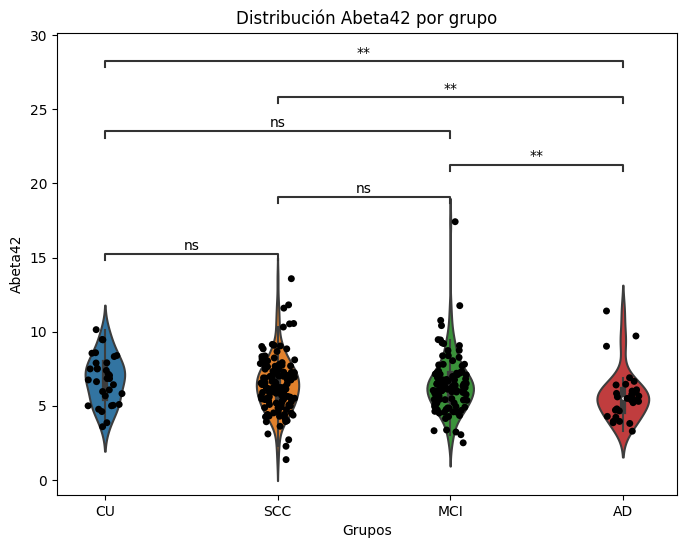

In [86]:
df_graficos = df.copy()
df_graficos = df_graficos[(df_graficos.grupos == 'controles') | (df_graficos.grupos == 'cohorte') | (df_graficos.grupos == 'alzheimer')]
order = df.nombre_corto.unique()

plt.figure(figsize=(8, 6))

ax = sns.violinplot(x='nombre_corto', y='Abeta42', data=df_graficos, orient='v', width=0.3, order=order)
sns.stripplot(x='nombre_corto', y='Abeta42', data=df_graficos, color='black', marker='o', jitter=True, size=5, order=order)

test_results = add_stat_annotation(ax, data=df_graficos, x='nombre_corto', y='Abeta42', order=order,
                                       box_pairs=[('CU','SCC'), ('CU','MCI'), ('CU', 'AD'), ('SCC', 'MCI'), ('SCC', 'AD'), ('MCI', 'AD')], #combinaciones
                                       test='Mann-Whitney', comparisons_correction=None, text_format='star',
                                       loc='inside', verbose=0)

plt.title('Distribución Abeta42 por grupo')
plt.xlabel('Grupos')
plt.ylabel('Abeta42')

#plt.xticks(rotation=90)
plt.show()

### Abeta40

In [85]:
df_graficos.head(1)

,ID,grupos,grupos2,nombre_corto,orden_grupos,Edad,Sexo,sexo_cuali,Escolaridad,Abeta42,Abeta40,GFAP,Nfl,ptau217,ratio Abeta42/ Abeta40,MoCA,gls_MoCA,ACEIII,gls_ACEIII
360,CTR_057,controles,controles,CU,1,73.0,2,mujer,17.0,5.673951,86.712077,132.477767,28.493225,NaN,0.065434,28.0,queja cognitiva,94.0,queja cognitiva


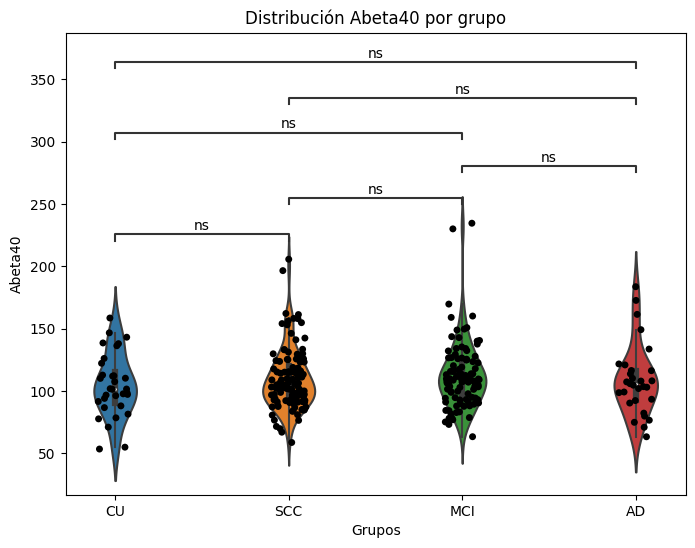

In [18]:
df_graficos = df.copy()
df_graficos = df_graficos[(df_graficos.grupos == 'controles') | (df_graficos.grupos == 'cohorte') | (df_graficos.grupos == 'alzheimer')]
order = df.nombre_corto.unique()

plt.figure(figsize=(8, 6))

ax = sns.violinplot(x='nombre_corto', y='Abeta40', data=df_graficos, orient='v', width=0.3, order=order)
sns.stripplot(x='nombre_corto', y='Abeta40', data=df_graficos, color='black', marker='o', jitter=True, size=5, order=order)

test_results = add_stat_annotation(ax, data=df_graficos, x='nombre_corto', y='Abeta40', order=order,
                                       box_pairs=[('CU','SCC'), ('CU','MCI'), ('CU', 'AD'), ('SCC', 'MCI'), ('SCC', 'AD'), ('MCI', 'AD')], #combinaciones
                                       test='Mann-Whitney', comparisons_correction=None, text_format='star',
                                       loc='inside', verbose=0)

plt.title('Distribución Abeta40 por grupo')
plt.xlabel('Grupos')
plt.ylabel('Abeta40')

#plt.xticks(rotation=90)
plt.show()

### GFAP

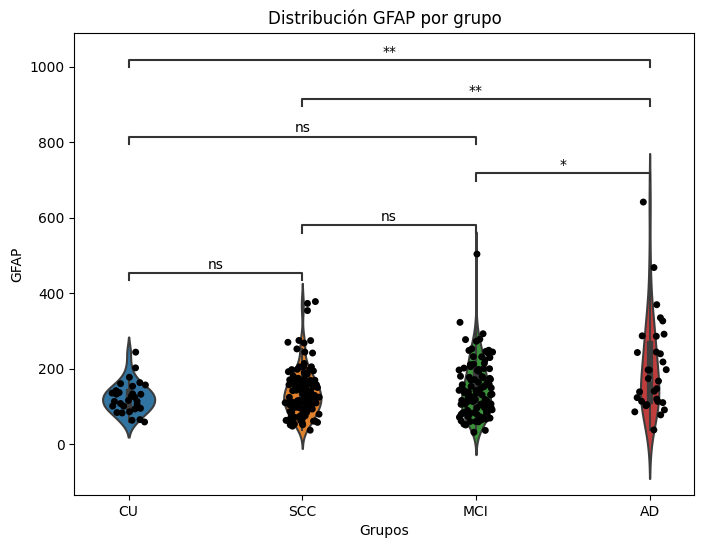

In [19]:
df_graficos = df.copy()
df_graficos = df_graficos[(df_graficos.grupos == 'controles') | (df_graficos.grupos == 'cohorte') | (df_graficos.grupos == 'alzheimer')]
order = df.nombre_corto.unique()

plt.figure(figsize=(8, 6))

ax = sns.violinplot(x='nombre_corto', y='GFAP', data=df_graficos, orient='v', width=0.3, order=order)
sns.stripplot(x='nombre_corto', y='GFAP', data=df_graficos, color='black', marker='o', jitter=True, size=5, order=order)

test_results = add_stat_annotation(ax, data=df_graficos, x='nombre_corto', y='GFAP', order=order,
                                       box_pairs=[('CU','SCC'), ('CU','MCI'), ('CU', 'AD'), ('SCC', 'MCI'), ('SCC', 'AD'), ('MCI', 'AD')], #combinaciones
                                       test='Mann-Whitney', comparisons_correction=None, text_format='star',
                                       loc='inside', verbose=0)

plt.title('Distribución GFAP por grupo')
plt.xlabel('Grupos')
plt.ylabel('GFAP')

#plt.xticks(rotation=90)
plt.show()

### Nfl

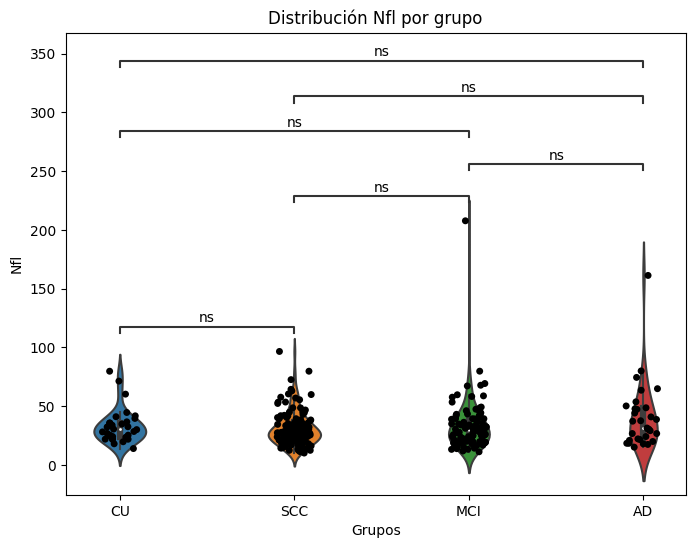

In [20]:
df_graficos = df.copy()
df_graficos = df_graficos[(df_graficos.grupos == 'controles') | (df_graficos.grupos == 'cohorte') | (df_graficos.grupos == 'alzheimer')]
order = df.nombre_corto.unique()

plt.figure(figsize=(8, 6))

ax = sns.violinplot(x='nombre_corto', y='Nfl', data=df_graficos, orient='v', width=0.3, order=order)
sns.stripplot(x='nombre_corto', y='Nfl', data=df_graficos, color='black', marker='o', jitter=True, size=5, order=order)

test_results = add_stat_annotation(ax, data=df_graficos, x='nombre_corto', y='Nfl', order=order,
                                       box_pairs=[('CU','SCC'), ('CU','MCI'), ('CU', 'AD'), ('SCC', 'MCI'), ('SCC', 'AD'), ('MCI', 'AD')], #combinaciones
                                       test='Mann-Whitney', comparisons_correction=None, text_format='star',
                                       loc='inside', verbose=0)

plt.title('Distribución Nfl por grupo')
plt.xlabel('Grupos')
plt.ylabel('Nfl')

#plt.xticks(rotation=90)
plt.show()

### ptau217

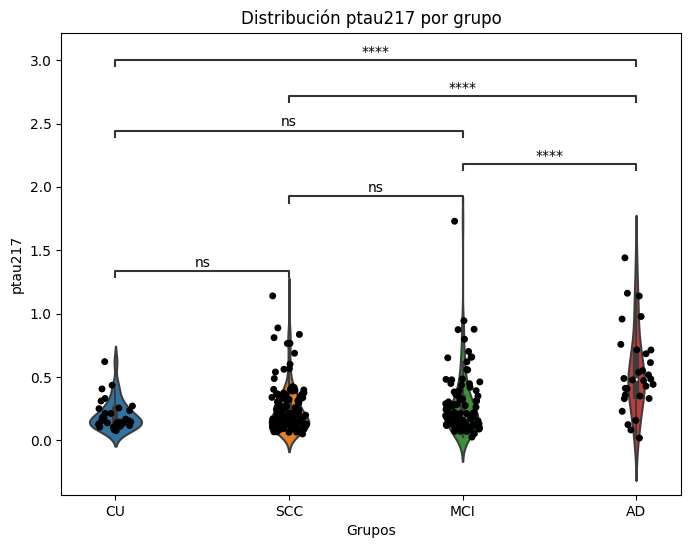

In [21]:
df_graficos = df.copy()
df_graficos = df_graficos[(df_graficos.grupos == 'controles') | (df_graficos.grupos == 'cohorte') | (df_graficos.grupos == 'alzheimer')]
order = df.nombre_corto.unique()

plt.figure(figsize=(8, 6))

ax = sns.violinplot(x='nombre_corto', y='ptau217', data=df_graficos, orient='v', width=0.3, order=order)
sns.stripplot(x='nombre_corto', y='ptau217', data=df_graficos, color='black', marker='o', jitter=True, size=5, order=order)

test_results = add_stat_annotation(ax, data=df_graficos, x='nombre_corto', y='ptau217', order=order,
                                       box_pairs=[('CU','SCC'), ('CU','MCI'), ('CU', 'AD'), ('SCC', 'MCI'), ('SCC', 'AD'), ('MCI', 'AD')], #combinaciones
                                       test='Mann-Whitney', comparisons_correction=None, text_format='star',
                                       loc='inside', verbose=0)

plt.title('Distribución ptau217 por grupo')
plt.xlabel('Grupos')
plt.ylabel('ptau217')

#plt.xticks(rotation=90)
plt.show()

### ratio Abeta42/ Abeta40

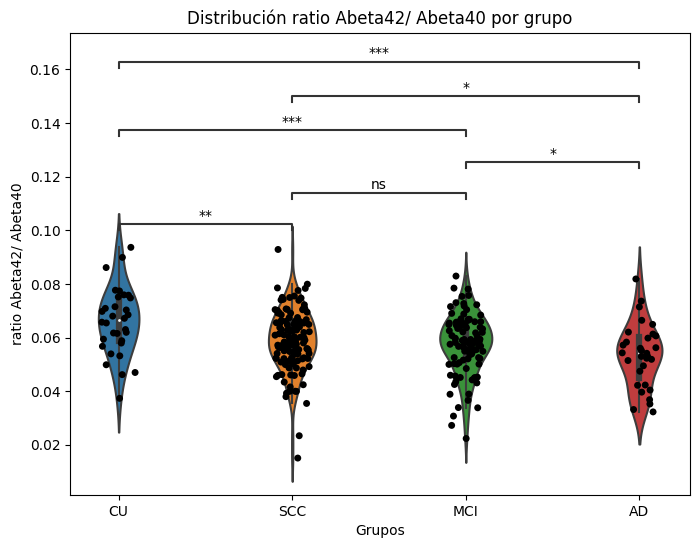

In [22]:
df_graficos = df.copy()
df_graficos = df_graficos[(df_graficos.grupos == 'controles') | (df_graficos.grupos == 'cohorte') | (df_graficos.grupos == 'alzheimer')]
order = df.nombre_corto.unique()

plt.figure(figsize=(8, 6))

ax = sns.violinplot(x='nombre_corto', y='ratio Abeta42/ Abeta40', data=df_graficos, orient='v', width=0.3, order=order)
sns.stripplot(x='nombre_corto', y='ratio Abeta42/ Abeta40', data=df_graficos, color='black', marker='o', jitter=True, size=5, order=order)

test_results = add_stat_annotation(ax, data=df_graficos, x='nombre_corto', y='ratio Abeta42/ Abeta40', order=order,
                                       box_pairs=[('CU','SCC'), ('CU','MCI'), ('CU', 'AD'), ('SCC', 'MCI'), ('SCC', 'AD'), ('MCI', 'AD')], #combinaciones
                                       test='Mann-Whitney', comparisons_correction=None, text_format='star',
                                       loc='inside', verbose=0)

plt.title('Distribución ratio Abeta42/ Abeta40 por grupo')
plt.xlabel('Grupos')
plt.ylabel('ratio Abeta42/ Abeta40')

#plt.xticks(rotation=90)
plt.show()

## Correlaciones

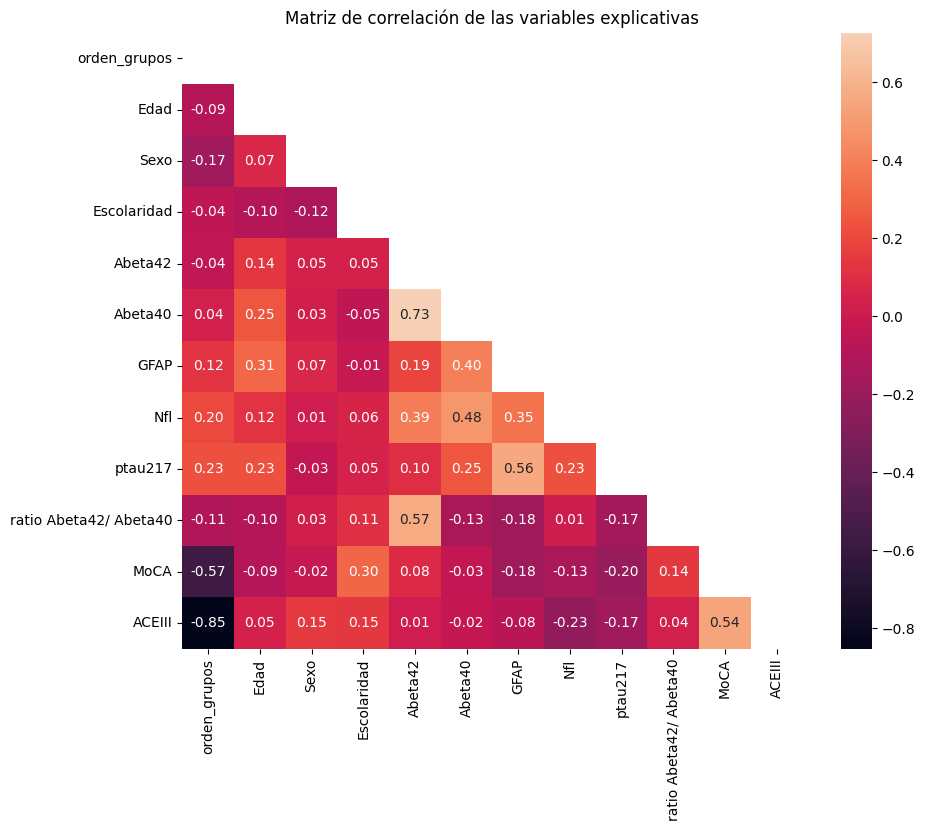

In [23]:
correlation_matrix = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='rocket', center=0, annot=True, fmt=".2f", mask=mask)
plt.title('Matriz de correlación de las variables explicativas')
plt.show()

### Correlación Abeta40 y Abeta42

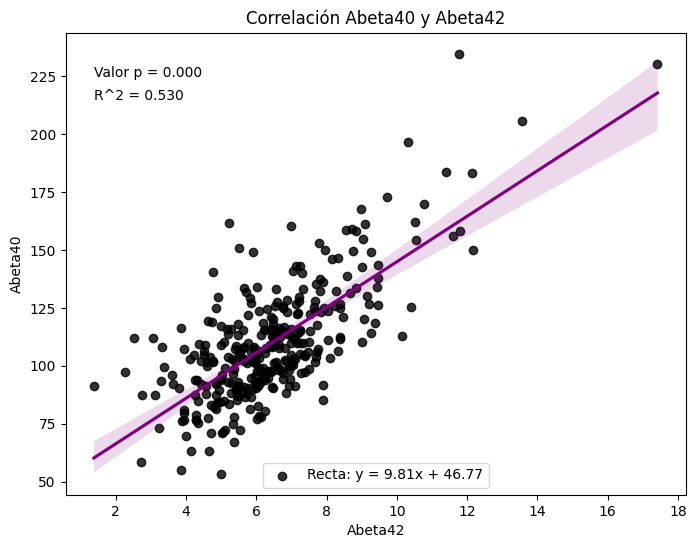

In [24]:
df_clean = df.dropna(subset=['Abeta42', 'Abeta40'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Abeta42'], df_clean['Abeta40'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Abeta42', y='Abeta40', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Abeta42'].min(), df_clean['Abeta40'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Abeta42'].min(), df_clean['Abeta40'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta40 y Abeta42')
    plt.xlabel('Abeta42')
    plt.ylabel('Abeta40')
    plt.legend(loc='lower center')
    plt.show()


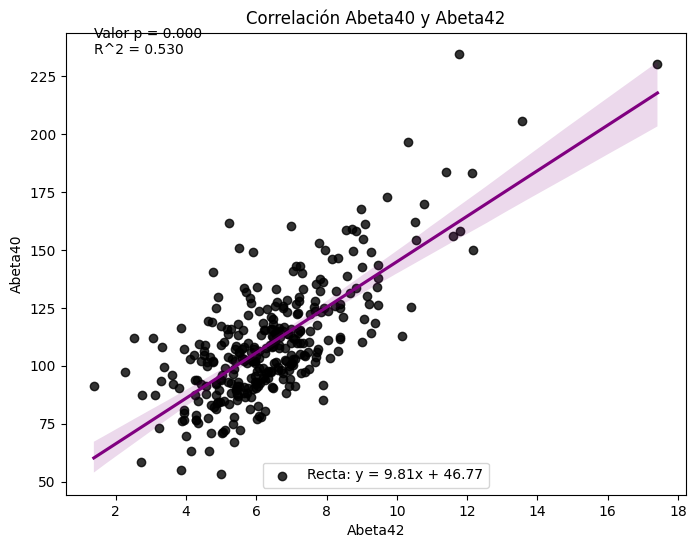

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

df_clean = df.dropna(subset=['Abeta42', 'Abeta40'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Abeta42'], df_clean['Abeta40'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Abeta42', y='Abeta40', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Abeta42'].min(), df_clean['Abeta40'].max(), f'Valor p = {p_value:.3f}\nR^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta40 y Abeta42')
    plt.xlabel('Abeta42')
    plt.ylabel('Abeta40')
    plt.legend(loc='lower center')
    plt.show()


### Correlación Nfl y GFAP

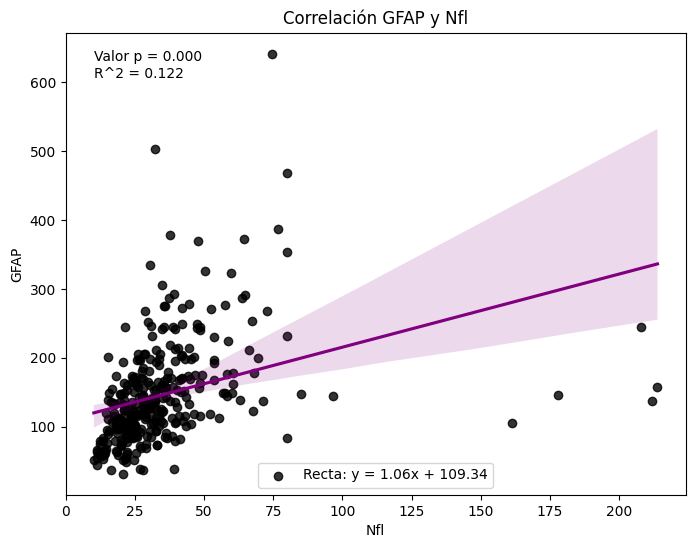

In [26]:
df_clean = df.dropna(subset=['Nfl', 'GFAP'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Nfl'], df_clean['GFAP'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Nfl', y='GFAP', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Nfl'].min(), df_clean['GFAP'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Nfl'].min(), df_clean['GFAP'].max() - 35, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación GFAP y Nfl')
    plt.xlabel('Nfl')
    plt.ylabel('GFAP')
    plt.legend(loc='lower center')
    plt.show()

### Correlación Nfl y ptau217

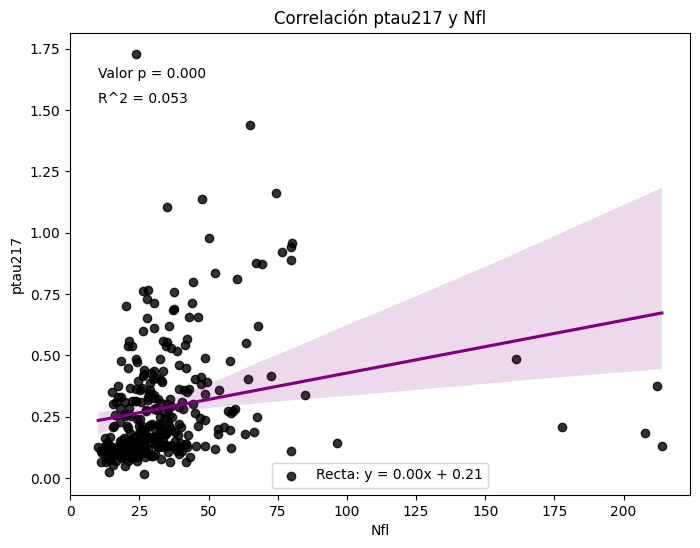

In [27]:
df_clean = df.dropna(subset=['Nfl', 'ptau217'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Nfl'], df_clean['ptau217'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Nfl', y='ptau217', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Nfl'].min(), df_clean['ptau217'].max() - 0.1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Nfl'].min(), df_clean['ptau217'].max() - 0.2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación ptau217 y Nfl')
    plt.xlabel('Nfl')
    plt.ylabel('ptau217')
    plt.legend(loc='lower center')
    plt.show()


### Correlación ratio Abeta42/Abeta40 y ptau217

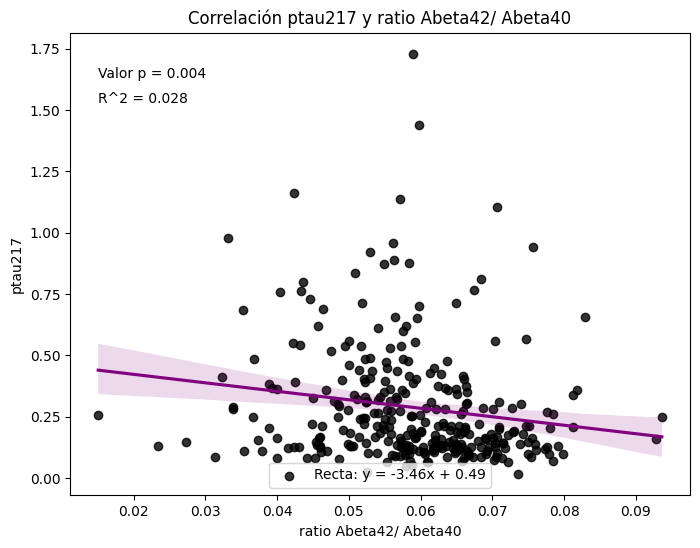

In [28]:
df_clean = df.dropna(subset=['ratio Abeta42/ Abeta40', 'ptau217'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['ratio Abeta42/ Abeta40'], df_clean['ptau217'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='ratio Abeta42/ Abeta40', y='ptau217', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['ratio Abeta42/ Abeta40'].min(), df_clean['ptau217'].max() - 0.1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['ratio Abeta42/ Abeta40'].min(), df_clean['ptau217'].max() - 0.2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación ptau217 y ratio Abeta42/ Abeta40')
    plt.xlabel('ratio Abeta42/ Abeta40')
    plt.ylabel('ptau217')
    plt.legend(loc='lower center')
    plt.show()

# Análisis DF completo

In [29]:
df_completo['gls_MoCA'] = np.where(df_completo.MoCA >= 21, 'queja cognitiva', 'deterioro cognitivo')
df_completo['sexo_cuali'] = np.where(df_completo.Sexo == 1, 'hombre', 'mujer')
df_completo['grupos'] = df_completo['ID'].apply(gls_grupos)
df_completo['ratio Abeta42/ Abeta40'] = df_completo['Abeta42']/ df_completo['Abeta40']
df_completo['grupos2'] = np.where(df_completo.grupos == 'cohorte', df_completo.gls_MoCA, df_completo.grupos)

df_completo = df_completo[['ID', 'grupos', 'grupos2', 'Edad', 'Sexo', 'sexo_cuali', 'Escolaridad', 'Abeta42', 'Abeta40', 'GFAP', 'Nfl', 'ptau217', 'ratio Abeta42/ Abeta40','MoCA', 'gls_MoCA',
                           'Global cognition', 'Memory', 'Attention', 'Language', 'Visuospatial', 'Executive function', 'Social cognition', 'Functionality']]

# Reemplazar valores sin información por nan
df_completo['Edad'] = df_completo['Edad'].replace(-14, np.nan)
df_completo['Escolaridad'] = df_completo['Escolaridad'].replace(-14, np.nan)
df_completo['MoCA'] = df_completo['MoCA'].replace(-14, np.nan)
df_completo['Global cognition'] = df_completo['Global cognition'].replace(-14, np.nan)
df_completo['Global cognition'] = df_completo['Global cognition'].replace(-15, np.nan)
df_completo['Global cognition'] = df_completo['Global cognition'].replace(-8, np.nan)
df_completo['Memory'] = df_completo['Memory'].replace(-14, np.nan)
df_completo['Attention'] = df_completo['Attention'].replace(-14, np.nan)
df_completo['Language'] = df_completo['Language'].replace(-14, np.nan)
df_completo['Visuospatial'] = df_completo['Visuospatial'].replace(-14, np.nan)
df_completo['Executive function'] = df_completo['Executive function'].replace(-14, np.nan)
df_completo['Executive function'] = df_completo['Executive function'].replace(-8, np.nan)
df_completo['Social cognition'] = df_completo['Social cognition'].replace(-14, np.nan)
df_completo['Functionality'] = df_completo['Functionality'].replace(-14, np.nan)

In [30]:
df_completo.describe()

,Edad,Sexo,Escolaridad,Abeta42,Abeta40,GFAP,Nfl,ptau217,ratio Abeta42/ Abeta40,MoCA,Global cognition,Memory,Attention,Language,Visuospatial,Executive function,Social cognition,Functionality
count,360.000000,361.000000,357.000000,328.000000,327.000000,327.000000,328.000000,333.000000,327.000000,344.000000,339.000000,342.000000,327.000000,332.000000,333.000000,332.000000,335.000000,316.000000
mean,76.005556,1.722992,10.019608,6.430670,109.839041,146.503921,35.030781,0.285007,0.058861,20.840116,72.398230,29.119883,102.868502,24.259036,26.596096,15.843373,20.786499,15.250000
std,5.931829,0.448142,5.021544,1.879495,25.359885,76.337564,25.031195,0.238255,0.011843,5.078453,19.963668,8.755071,71.799383,3.635060,7.922426,5.425228,4.353158,16.490425
min,42.000000,1.000000,0.000000,1.376601,53.478393,31.762383,10.131844,0.018148,0.015074,4.000000,18.000000,0.000000,1.000000,8.000000,2.500000,0.000000,3.750000,0.000000
25%,72.000000,1.000000,6.000000,5.268524,93.153738,97.291116,21.936659,0.128028,0.052233,17.000000,64.500000,25.000000,63.000000,22.750000,22.000000,12.375000,18.294500,5.000000
50%,75.500000,2.000000,10.000000,6.246918,106.316491,132.477767,29.445442,0.203496,0.058767,22.000000,78.000000,31.000000,86.000000,25.000000,29.000000,16.000000,21.429000,9.000000
75%,79.000000,2.000000,13.000000,7.246315,122.006922,172.709741,39.656719,0.359600,0.066215,25.000000,87.000000,35.000000,120.000000,27.000000,33.000000,20.125000,24.080500,19.000000
max,97.000000,2.000000,34.000000,17.418918,234.637178,641.478807,213.853318,1.728804,0.093632,30.000000,100.000000,46.000000,795.000000,30.000000,36.000000,26.000000,28.446000,88.000000


In [31]:
df_completo.grupos2.unique()

array(['queja cognitiva', 'deterioro cognitivo', 'parkinson',
       'demencia frontotemporal', 'alzheimer', 'controles'], dtype=object)

In [32]:
print(len(df_completo[df_completo.grupos2=='queja cognitiva']))
print(len(df_completo[df_completo.grupos2=='deterioro cognitivo']))
print(len(df_completo[df_completo.grupos2=='alzheimer']))
print(len(df_completo[df_completo.grupos2=='controles']))
print(len(df_completo[df_completo.grupos2=='demencia frontotemporal']))
print(len(df_completo[df_completo.grupos2=='parkinson']))

140
111
32
37
18
23


### Controles

In [33]:
df_controles = df_completo[df_completo.grupos2 == 'controles']
df_controles.describe()

,Edad,Sexo,Escolaridad,Abeta42,Abeta40,GFAP,Nfl,ptau217,ratio Abeta42/ Abeta40,MoCA,Global cognition,Memory,Attention,Language,Visuospatial,Executive function,Social cognition,Functionality
count,36.000000,37.000000,36.000000,32.000000,32.000000,32.000000,32.000000,30.000000,32.000000,34.000000,35.000000,36.000000,34.000000,35.000000,34.000000,28.000000,35.000000,24.000000
mean,75.694444,1.675676,13.194444,6.776171,104.518906,123.469825,33.149265,0.201125,0.066003,25.382353,88.171429,33.611111,69.588235,25.542857,29.191176,19.785714,23.257600,7.250000
std,4.152930,0.474579,4.773854,1.652895,25.263648,40.016891,14.430410,0.120307,0.012588,2.954347,7.147545,4.357442,22.100484,2.343236,5.048274,3.454542,3.669636,7.736138
min,70.000000,1.000000,3.000000,3.594905,53.478393,59.228512,13.955620,0.075815,0.037343,16.000000,70.000000,24.000000,30.000000,19.000000,15.500000,10.500000,14.464000,0.000000
25%,73.000000,1.000000,10.750000,5.529066,90.755984,97.658683,24.037842,0.125259,0.058608,23.000000,83.500000,31.750000,56.000000,24.000000,27.250000,17.375000,21.670000,2.000000
50%,75.000000,2.000000,13.000000,6.843325,101.522157,120.479957,30.309943,0.152751,0.066454,25.500000,90.000000,34.000000,67.500000,26.000000,31.000000,20.250000,24.054000,4.500000
75%,77.250000,2.000000,17.000000,7.893337,115.177680,138.344044,35.979619,0.246261,0.074857,28.000000,94.000000,37.000000,76.500000,27.000000,32.750000,22.000000,26.089500,9.000000
max,91.000000,2.000000,22.000000,10.139650,158.590950,244.092023,79.778504,0.620923,0.093632,30.000000,99.000000,46.000000,127.000000,29.000000,35.000000,25.000000,28.446000,33.000000


In [34]:
df_controles_corto = df_controles[['Edad', 'Escolaridad', 'Global cognition', 'Memory', 'Attention', 'Language', 'Visuospatial', 'Executive function', 'Functionality']]
df_controles_corto.describe()

,Edad,Escolaridad,Global cognition,Memory,Attention,Language,Visuospatial,Executive function,Functionality
count,36.000000,36.000000,35.000000,36.000000,34.000000,35.000000,34.000000,28.000000,24.000000
mean,75.694444,13.194444,88.171429,33.611111,69.588235,25.542857,29.191176,19.785714,7.250000
std,4.152930,4.773854,7.147545,4.357442,22.100484,2.343236,5.048274,3.454542,7.736138
min,70.000000,3.000000,70.000000,24.000000,30.000000,19.000000,15.500000,10.500000,0.000000
25%,73.000000,10.750000,83.500000,31.750000,56.000000,24.000000,27.250000,17.375000,2.000000
50%,75.000000,13.000000,90.000000,34.000000,67.500000,26.000000,31.000000,20.250000,4.500000
75%,77.250000,17.000000,94.000000,37.000000,76.500000,27.000000,32.750000,22.000000,9.000000
max,91.000000,22.000000,99.000000,46.000000,127.000000,29.000000,35.000000,25.000000,33.000000


In [35]:
len(df_controles[df_controles.sexo_cuali=='mujer'])/ len(df_controles)

0.6756756756756757

### Queja cognitiva

In [36]:
df_qc = df_completo[df_completo.grupos2 == 'queja cognitiva']
df_qc.describe()

,Edad,Sexo,Escolaridad,Abeta42,Abeta40,GFAP,Nfl,ptau217,ratio Abeta42/ Abeta40,MoCA,Global cognition,Memory,Attention,Language,Visuospatial,Executive function,Social cognition,Functionality
count,140.000000,140.000000,140.000000,125.000000,124.000000,124.000000,125.000000,134.000000,124.000000,140.000000,134.000000,133.000000,132.000000,132.000000,133.000000,133.000000,131.000000,130.000000
mean,75.792857,1.757143,10.457143,6.447069,109.257652,138.436101,31.146881,0.243379,0.058908,24.414286,84.604478,32.902256,86.053030,26.000000,30.266917,18.432331,22.535588,8.692308
std,4.800324,0.430349,4.342150,1.859981,23.933999,63.416443,14.564117,0.186247,0.011372,2.329003,7.404549,5.989719,44.456053,2.446371,5.284178,4.522998,3.331975,7.788728
min,69.000000,1.000000,0.000000,1.376601,58.749570,37.381741,10.131844,0.050353,0.015074,21.000000,63.000000,6.000000,1.000000,19.000000,5.000000,0.000000,9.750000,0.000000
25%,72.000000,2.000000,7.000000,5.289458,93.585300,96.670521,21.876843,0.126602,0.052317,22.000000,80.000000,30.000000,58.000000,25.000000,28.000000,15.500000,20.678500,4.000000
50%,75.000000,2.000000,11.000000,6.318161,104.413537,126.445534,27.725926,0.167763,0.058861,24.000000,84.000000,34.000000,76.500000,26.000000,32.000000,19.000000,23.143000,7.000000
75%,79.000000,2.000000,12.000000,7.359154,120.006402,164.534899,36.219639,0.314433,0.066025,26.000000,90.000000,36.000000,99.250000,28.000000,34.000000,22.000000,24.964000,11.000000
max,92.000000,2.000000,24.000000,13.576509,205.749061,377.999146,96.606938,1.139766,0.092842,30.000000,100.000000,45.000000,283.000000,30.000000,36.000000,26.000000,28.393000,49.000000


In [37]:
len(df_qc[df_qc.sexo_cuali=='mujer'])/ len(df_qc)

0.7571428571428571

In [38]:
df_qc_corto = df_qc[['Edad', 'Escolaridad', 'Global cognition', 'Memory', 'Attention', 'Language', 'Visuospatial', 'Executive function', 'Functionality']]
df_qc_corto.describe()

,Edad,Escolaridad,Global cognition,Memory,Attention,Language,Visuospatial,Executive function,Functionality
count,140.000000,140.000000,134.000000,133.000000,132.000000,132.000000,133.000000,133.000000,130.000000
mean,75.792857,10.457143,84.604478,32.902256,86.053030,26.000000,30.266917,18.432331,8.692308
std,4.800324,4.342150,7.404549,5.989719,44.456053,2.446371,5.284178,4.522998,7.788728
min,69.000000,0.000000,63.000000,6.000000,1.000000,19.000000,5.000000,0.000000,0.000000
25%,72.000000,7.000000,80.000000,30.000000,58.000000,25.000000,28.000000,15.500000,4.000000
50%,75.000000,11.000000,84.000000,34.000000,76.500000,26.000000,32.000000,19.000000,7.000000
75%,79.000000,12.000000,90.000000,36.000000,99.250000,28.000000,34.000000,22.000000,11.000000
max,92.000000,24.000000,100.000000,45.000000,283.000000,30.000000,36.000000,26.000000,49.000000


### Deterioro cognitivo

In [39]:
df_dc = df_completo[df_completo.grupos2 == 'deterioro cognitivo']
df_dc.describe()

,Edad,Sexo,Escolaridad,Abeta42,Abeta40,GFAP,Nfl,ptau217,ratio Abeta42/ Abeta40,MoCA,Global cognition,Memory,Attention,Language,Visuospatial,Executive function,Social cognition,Functionality
count,111.000000,111.000000,109.000000,101.000000,101.000000,101.000000,101.000000,103.000000,101.000000,100.000000,100.000000,102.000000,94.000000,97.000000,95.000000,101.000000,102.000000,96.000000
mean,77.288288,1.864865,7.183486,6.441611,112.624301,149.506530,33.369573,0.279720,0.057510,16.710000,70.790000,28.637255,131.819149,22.690722,23.126316,12.594059,18.514186,11.406250
std,4.804141,0.343418,4.893619,1.975641,26.838333,74.288024,22.331958,0.242510,0.011195,2.723986,9.937476,6.332048,105.810031,3.186432,8.341440,4.391306,3.685075,10.314607
min,69.000000,1.000000,0.000000,2.508003,63.373882,31.762383,11.196066,0.025809,0.022370,10.000000,43.000000,8.000000,39.000000,13.000000,5.500000,2.000000,7.714000,0.000000
25%,74.000000,2.000000,4.000000,5.374238,94.706987,96.575083,20.973830,0.127867,0.052073,15.000000,63.000000,25.000000,77.000000,21.000000,17.750000,9.500000,16.219000,5.000000
50%,77.000000,2.000000,6.000000,6.235074,109.138223,136.838188,29.718843,0.201403,0.058520,17.000000,70.000000,29.000000,108.500000,23.000000,24.500000,13.000000,18.643000,9.000000
75%,80.500000,2.000000,10.000000,7.147897,125.062990,196.791102,39.350302,0.333040,0.065065,19.000000,77.000000,33.000000,145.500000,25.000000,30.250000,15.500000,20.892500,14.250000
max,89.000000,2.000000,34.000000,17.418918,234.637178,503.728257,207.809263,1.728804,0.082930,20.000000,95.000000,44.000000,795.000000,28.000000,36.000000,25.500000,27.107000,56.000000


In [40]:
len(df_dc[df_dc.sexo_cuali=='mujer'])/ len(df_dc)

0.8648648648648649

In [41]:
df_dc_corto = df_dc[['Edad', 'Escolaridad', 'Global cognition', 'Memory', 'Attention', 'Language', 'Visuospatial', 'Executive function', 'Functionality']]
df_dc_corto.describe()

,Edad,Escolaridad,Global cognition,Memory,Attention,Language,Visuospatial,Executive function,Functionality
count,111.000000,109.000000,100.000000,102.000000,94.000000,97.000000,95.000000,101.000000,96.000000
mean,77.288288,7.183486,70.790000,28.637255,131.819149,22.690722,23.126316,12.594059,11.406250
std,4.804141,4.893619,9.937476,6.332048,105.810031,3.186432,8.341440,4.391306,10.314607
min,69.000000,0.000000,43.000000,8.000000,39.000000,13.000000,5.500000,2.000000,0.000000
25%,74.000000,4.000000,63.000000,25.000000,77.000000,21.000000,17.750000,9.500000,5.000000
50%,77.000000,6.000000,70.000000,29.000000,108.500000,23.000000,24.500000,13.000000,9.000000
75%,80.500000,10.000000,77.000000,33.000000,145.500000,25.000000,30.250000,15.500000,14.250000
max,89.000000,34.000000,95.000000,44.000000,795.000000,28.000000,36.000000,25.500000,56.000000


### Alzheimer

In [42]:
df_ad = df_completo[df_completo.grupos2 == 'alzheimer']
df_ad.describe()

,Edad,Sexo,Escolaridad,Abeta42,Abeta40,GFAP,Nfl,ptau217,ratio Abeta42/ Abeta40,MoCA,Global cognition,Memory,Attention,Language,Visuospatial,Executive function,Social cognition,Functionality
count,32.00000,32.000000,32.000000,31.000000,31.000000,31.000000,31.000000,30.000000,31.000000,32.0000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,29.000000,31.000000
mean,77.84375,1.468750,12.093750,5.703083,108.754992,206.235476,40.704170,0.544672,0.053353,15.0625,63.156250,11.687500,124.225806,21.125000,21.671875,12.671875,19.293034,41.322581
std,7.59503,0.507007,4.808322,1.731163,28.045218,127.709852,28.360868,0.331155,0.011909,4.4209,12.730733,7.213059,52.921772,4.897333,9.755569,5.148770,5.248266,14.654663
min,64.00000,1.000000,4.000000,3.292136,63.324573,38.130811,15.150276,0.018148,0.032289,6.0000,37.000000,0.000000,57.000000,11.000000,2.500000,3.000000,3.750000,11.000000
25%,73.50000,1.000000,8.000000,4.686533,92.904426,113.729284,21.919553,0.351483,0.044880,13.0000,55.000000,5.750000,94.000000,18.750000,16.750000,8.875000,16.661000,33.000000
50%,77.00000,1.000000,12.000000,5.502633,105.904809,174.148152,31.422244,0.480093,0.054136,15.0000,62.500000,12.000000,106.000000,22.000000,23.250000,13.000000,19.875000,38.000000
75%,82.25000,2.000000,16.000000,6.040240,116.416101,265.289855,48.224491,0.705363,0.060209,18.2500,75.500000,17.250000,153.000000,25.000000,29.125000,16.000000,23.732000,48.000000
max,97.00000,2.000000,23.000000,11.397091,183.717292,641.478807,161.313200,1.440181,0.081846,23.0000,82.000000,24.000000,257.000000,28.000000,36.000000,23.000000,26.732000,76.000000


In [43]:
len(df_ad[df_ad.sexo_cuali=='mujer'])/ len(df_ad)

0.46875

In [44]:
df_ad_corto = df_ad[['Edad', 'Escolaridad', 'Global cognition', 'Memory', 'Attention', 'Language', 'Visuospatial', 'Executive function', 'Functionality']]
df_ad_corto.describe()

,Edad,Escolaridad,Global cognition,Memory,Attention,Language,Visuospatial,Executive function,Functionality
count,32.00000,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,31.000000
mean,77.84375,12.093750,63.156250,11.687500,124.225806,21.125000,21.671875,12.671875,41.322581
std,7.59503,4.808322,12.730733,7.213059,52.921772,4.897333,9.755569,5.148770,14.654663
min,64.00000,4.000000,37.000000,0.000000,57.000000,11.000000,2.500000,3.000000,11.000000
25%,73.50000,8.000000,55.000000,5.750000,94.000000,18.750000,16.750000,8.875000,33.000000
50%,77.00000,12.000000,62.500000,12.000000,106.000000,22.000000,23.250000,13.000000,38.000000
75%,82.25000,16.000000,75.500000,17.250000,153.000000,25.000000,29.125000,16.000000,48.000000
max,97.00000,23.000000,82.000000,24.000000,257.000000,28.000000,36.000000,23.000000,76.000000


## Correlaciones

### Abeta40 y global cognition

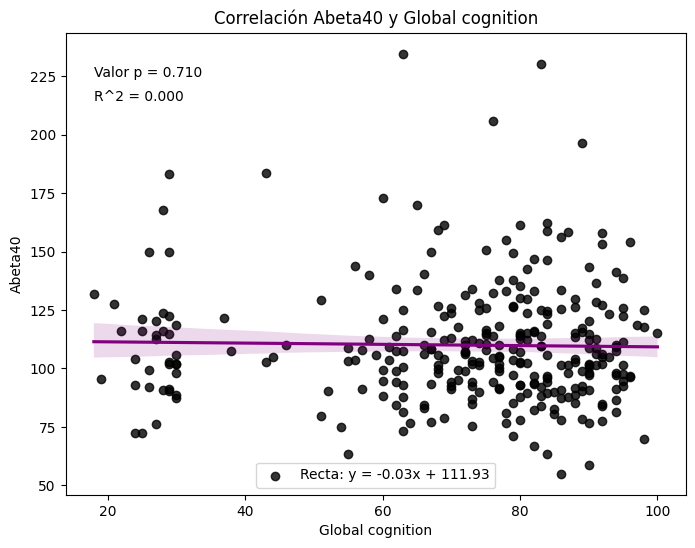

In [45]:
df_clean = df_completo.dropna(subset=['Abeta40', 'Global cognition'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Global cognition'], df_clean['Abeta40'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Global cognition', y='Abeta40', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Global cognition'].min(), df_clean['Abeta40'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Global cognition'].min(), df_clean['Abeta40'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta40 y Global cognition')
    plt.xlabel('Global cognition')
    plt.ylabel('Abeta40')
    plt.legend(loc='lower center')
    plt.show()

### Abeta40 y memory

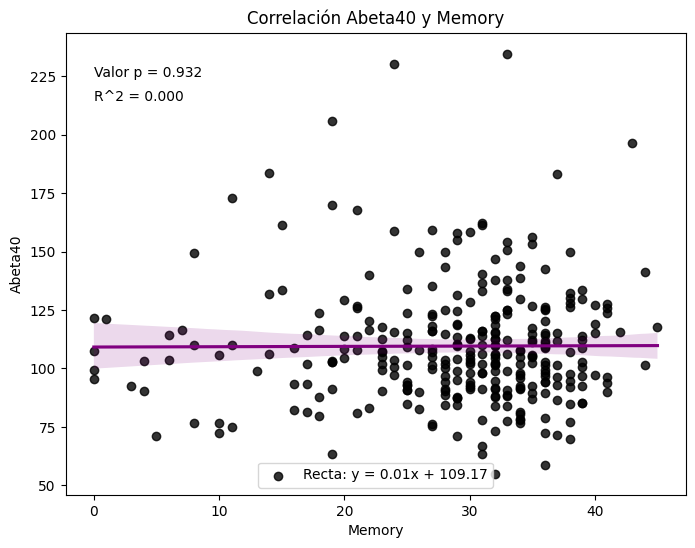

In [46]:
df_clean = df_completo.dropna(subset=['Abeta40', 'Memory'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Memory'], df_clean['Abeta40'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Memory', y='Abeta40', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Memory'].min(), df_clean['Abeta40'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Memory'].min(), df_clean['Abeta40'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta40 y Memory')
    plt.xlabel('Memory')
    plt.ylabel('Abeta40')
    plt.legend(loc='lower center')
    plt.show()

### Abeta40 y attention

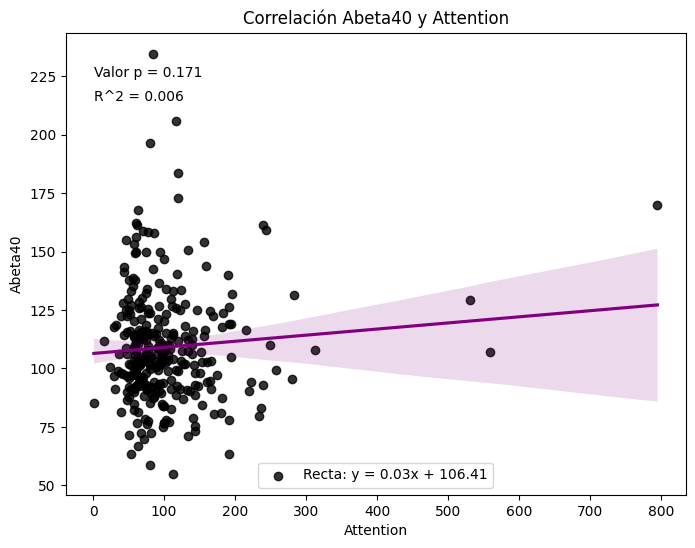

In [47]:
df_clean = df_completo.dropna(subset=['Abeta40', 'Attention'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Attention'], df_clean['Abeta40'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Attention', y='Abeta40', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Attention'].min(), df_clean['Abeta40'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Attention'].min(), df_clean['Abeta40'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta40 y Attention')
    plt.xlabel('Attention')
    plt.ylabel('Abeta40')
    plt.legend(loc='lower center')
    plt.show()

### Abeta40 y language

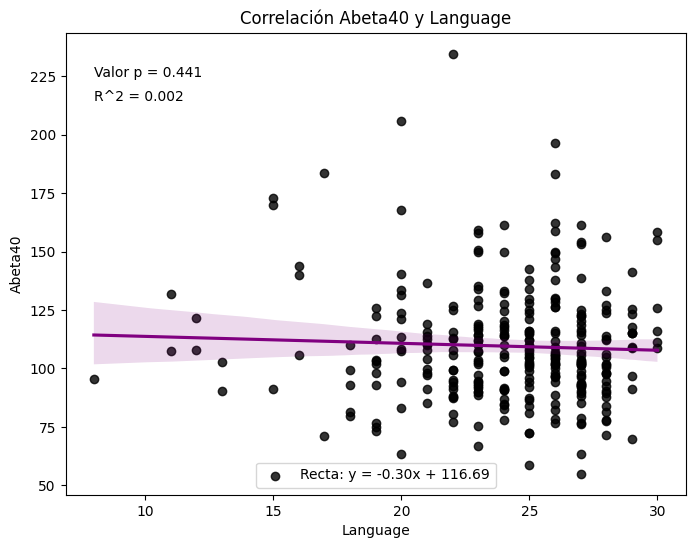

In [48]:
df_clean = df_completo.dropna(subset=['Abeta40', 'Language'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Language'], df_clean['Abeta40'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Language', y='Abeta40', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Language'].min(), df_clean['Abeta40'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Language'].min(), df_clean['Abeta40'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta40 y Language')
    plt.xlabel('Language')
    plt.ylabel('Abeta40')
    plt.legend(loc='lower center')
    plt.show()

### Abeta40 y visuospatial

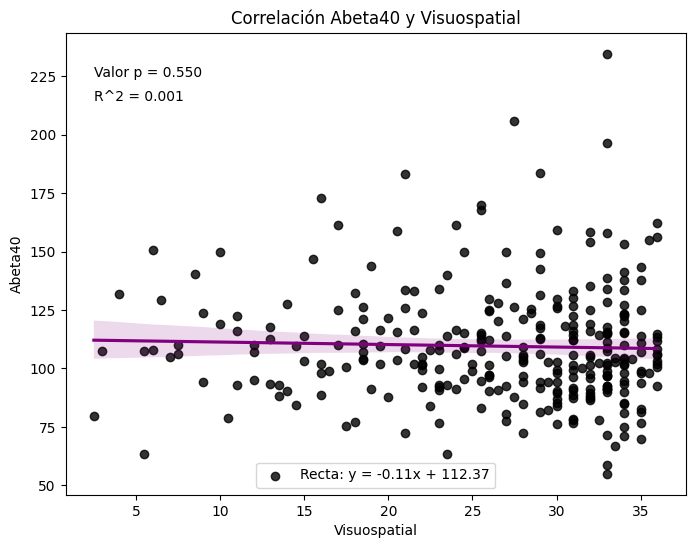

In [49]:
df_clean = df_completo.dropna(subset=['Abeta40', 'Visuospatial'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Visuospatial'], df_clean['Abeta40'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Visuospatial', y='Abeta40', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Visuospatial'].min(), df_clean['Abeta40'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Visuospatial'].min(), df_clean['Abeta40'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta40 y Visuospatial')
    plt.xlabel('Visuospatial')
    plt.ylabel('Abeta40')
    plt.legend(loc='lower center')
    plt.show()

### Abeta40 y Executive function

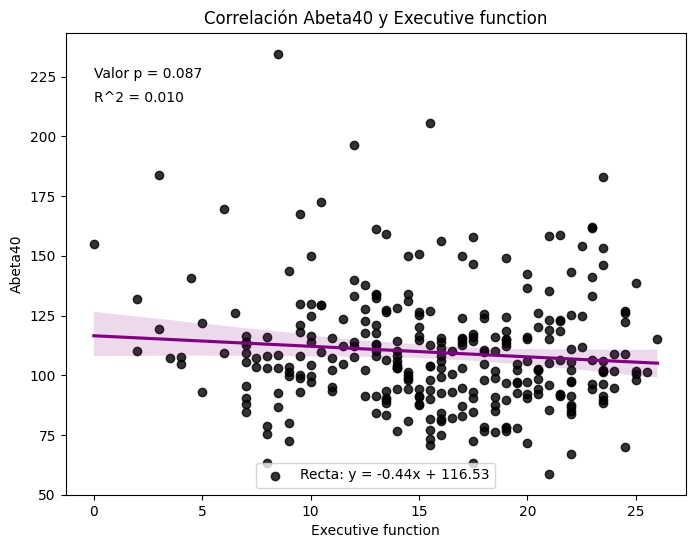

In [50]:
df_clean = df_completo.dropna(subset=['Abeta40', 'Executive function'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Executive function'], df_clean['Abeta40'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Executive function', y='Abeta40', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Executive function'].min(), df_clean['Abeta40'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Executive function'].min(), df_clean['Abeta40'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta40 y Executive function')
    plt.xlabel('Executive function')
    plt.ylabel('Abeta40')
    plt.legend(loc='lower center')
    plt.show()

### Abeta40 y Social cognition

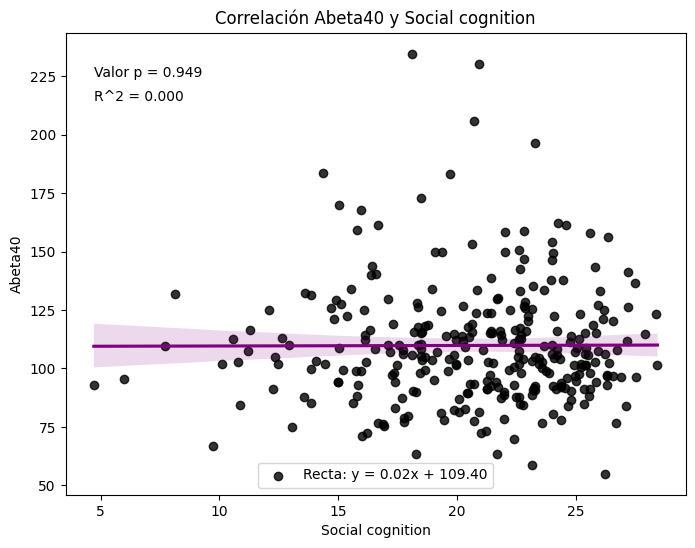

In [51]:
df_clean = df_completo.dropna(subset=['Abeta40', 'Social cognition'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Social cognition'], df_clean['Abeta40'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Social cognition', y='Abeta40', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Social cognition'].min(), df_clean['Abeta40'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Social cognition'].min(), df_clean['Abeta40'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta40 y Social cognition')
    plt.xlabel('Social cognition')
    plt.ylabel('Abeta40')
    plt.legend(loc='lower center')
    plt.show()

### Abeta40 y functionality

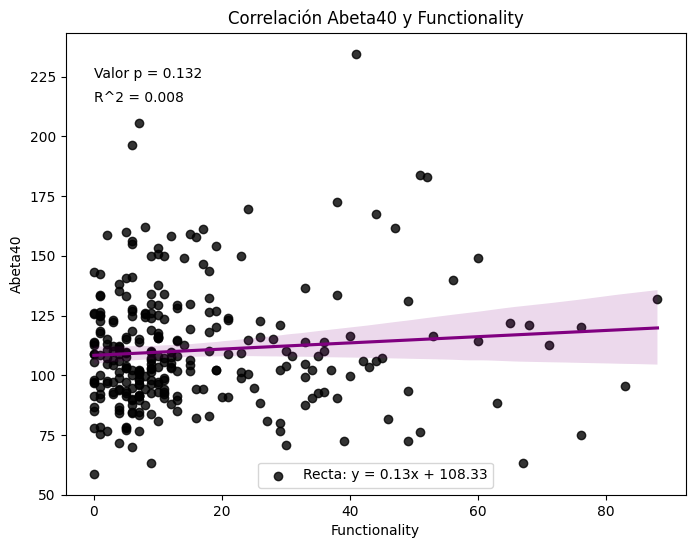

In [52]:
df_clean = df_completo.dropna(subset=['Abeta40', 'Functionality'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Functionality'], df_clean['Abeta40'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Functionality', y='Abeta40', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Functionality'].min(), df_clean['Abeta40'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Functionality'].min(), df_clean['Abeta40'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta40 y Functionality')
    plt.xlabel('Functionality')
    plt.ylabel('Abeta40')
    plt.legend(loc='lower center')
    plt.show()

### Abeta42 y global cognition

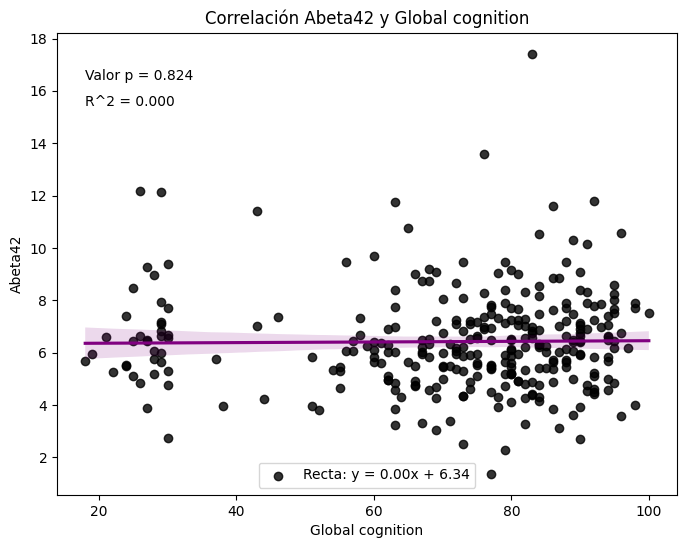

In [53]:
df_clean = df_completo.dropna(subset=['Abeta42', 'Global cognition'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Global cognition'], df_clean['Abeta42'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Global cognition', y='Abeta42', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Global cognition'].min(), df_clean['Abeta42'].max() - 1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Global cognition'].min(), df_clean['Abeta42'].max() - 2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta42 y Global cognition')
    plt.xlabel('Global cognition')
    plt.ylabel('Abeta42')
    plt.legend(loc='lower center')
    plt.show()

### Abeta42 y memory

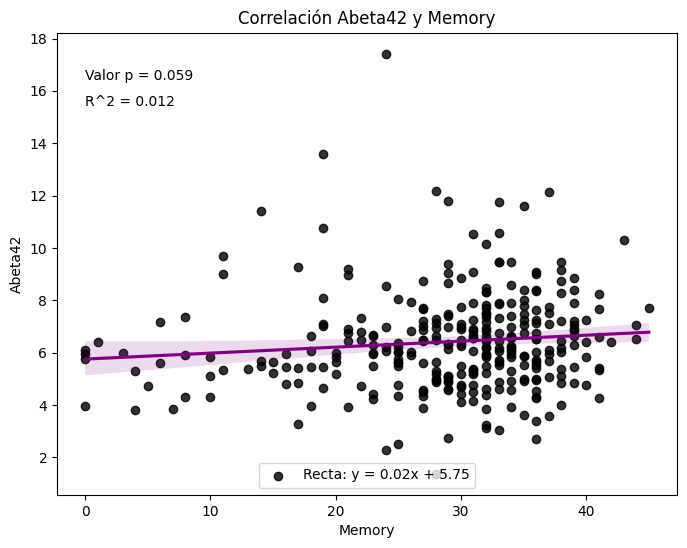

In [54]:
df_clean = df_completo.dropna(subset=['Abeta42', 'Memory'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Memory'], df_clean['Abeta42'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Memory', y='Abeta42', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Memory'].min(), df_clean['Abeta42'].max() - 1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Memory'].min(), df_clean['Abeta42'].max() - 2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta42 y Memory')
    plt.xlabel('Memory')
    plt.ylabel('Abeta42')
    plt.legend(loc='lower center')
    plt.show()

### Abeta42 y attention

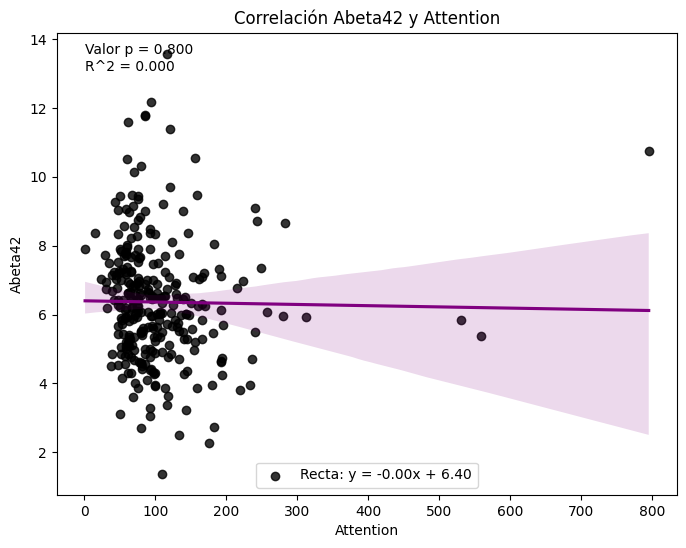

In [55]:
df_clean = df_completo.dropna(subset=['Abeta42', 'Attention'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Attention'], df_clean['Abeta42'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Attention', y='Abeta42', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Attention'].min(), df_clean['Abeta42'].max() - 0, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Attention'].min(), df_clean['Abeta42'].max() - 0.5, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta42 y Attention')
    plt.xlabel('Attention')
    plt.ylabel('Abeta42')
    plt.legend(loc='lower center')
    plt.show()

### Abeta42 y language

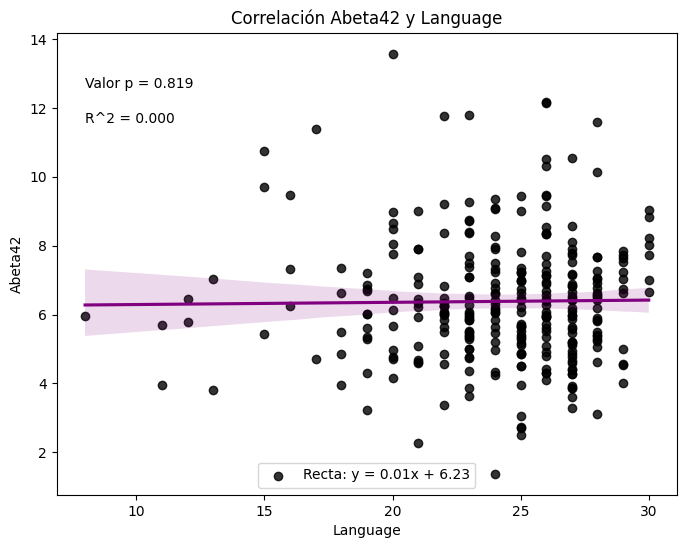

In [56]:
df_clean = df_completo.dropna(subset=['Abeta42', 'Language'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Language'], df_clean['Abeta42'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Language', y='Abeta42', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Language'].min(), df_clean['Abeta42'].max() - 1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Language'].min(), df_clean['Abeta42'].max() - 2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta42 y Language')
    plt.xlabel('Language')
    plt.ylabel('Abeta42')
    plt.legend(loc='lower center')
    plt.show()

### Abeta42 y visuospatial

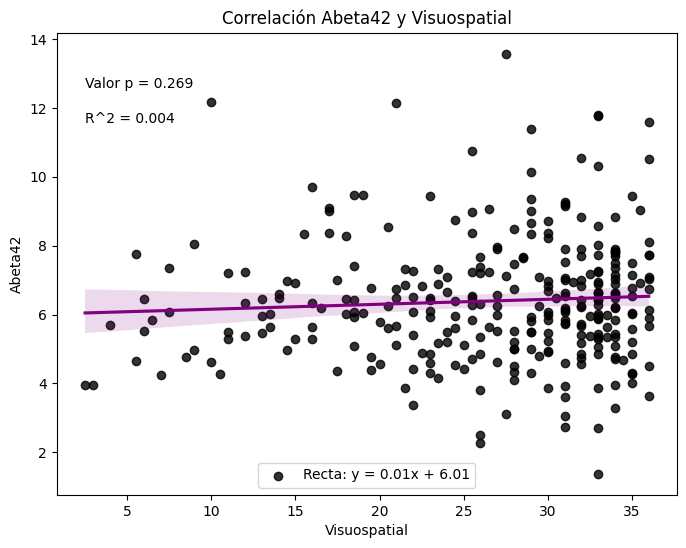

In [57]:
df_clean = df_completo.dropna(subset=['Abeta42', 'Visuospatial'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Visuospatial'], df_clean['Abeta42'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Visuospatial', y='Abeta42', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Visuospatial'].min(), df_clean['Abeta42'].max() - 1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Visuospatial'].min(), df_clean['Abeta42'].max() - 2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta42 y Visuospatial')
    plt.xlabel('Visuospatial')
    plt.ylabel('Abeta42')
    plt.legend(loc='lower center')
    plt.show()

### Abeta42 y Executive function

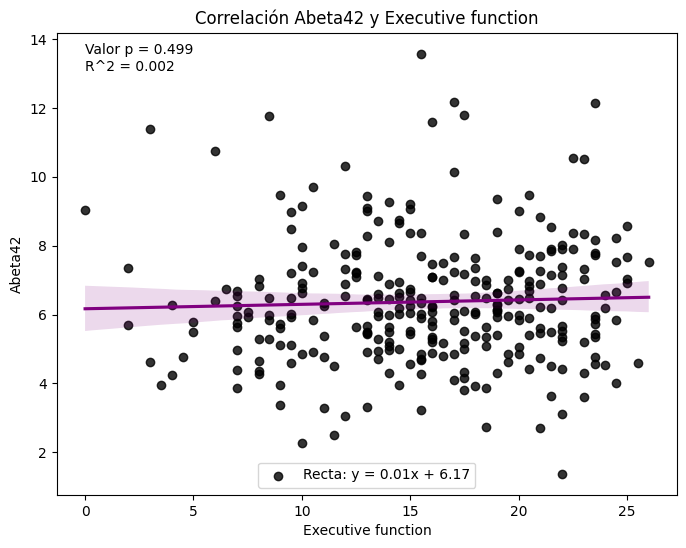

In [58]:
df_clean = df_completo.dropna(subset=['Abeta42', 'Executive function'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Executive function'], df_clean['Abeta42'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Executive function', y='Abeta42', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Executive function'].min(), df_clean['Abeta42'].max() - 0, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Executive function'].min(), df_clean['Abeta42'].max() - 0.5, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta42 y Executive function')
    plt.xlabel('Executive function')
    plt.ylabel('Abeta42')
    plt.legend(loc='lower center')
    plt.show()

### Abeta42 y Social cognition

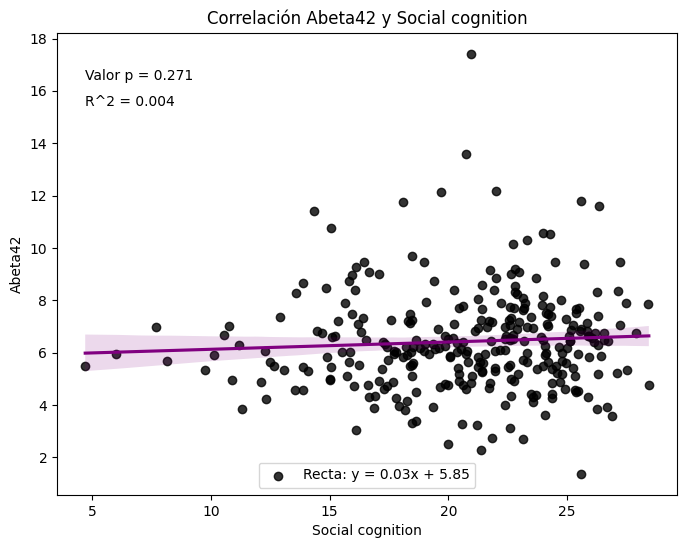

In [59]:
df_clean = df_completo.dropna(subset=['Abeta42', 'Social cognition'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Social cognition'], df_clean['Abeta42'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Social cognition', y='Abeta42', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Social cognition'].min(), df_clean['Abeta42'].max() - 1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Social cognition'].min(), df_clean['Abeta42'].max() - 2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta42 y Social cognition')
    plt.xlabel('Social cognition')
    plt.ylabel('Abeta42')
    plt.legend(loc='lower center')
    plt.show()

### Abeta42 y functionality

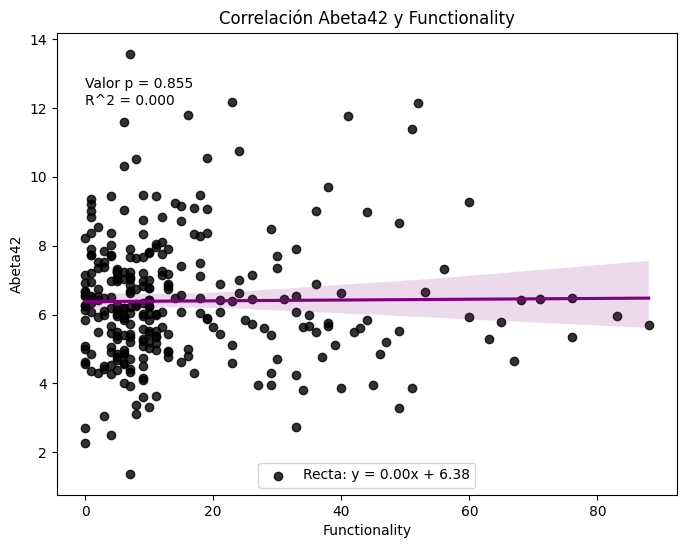

In [60]:
df_clean = df_completo.dropna(subset=['Abeta42', 'Functionality'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Functionality'], df_clean['Abeta42'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Functionality', y='Abeta42', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Functionality'].min(), df_clean['Abeta42'].max() - 1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Functionality'].min(), df_clean['Abeta42'].max() - 1.5, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Abeta42 y Functionality')
    plt.xlabel('Functionality')
    plt.ylabel('Abeta42')
    plt.legend(loc='lower center')
    plt.show()

### GFAP y global cognition

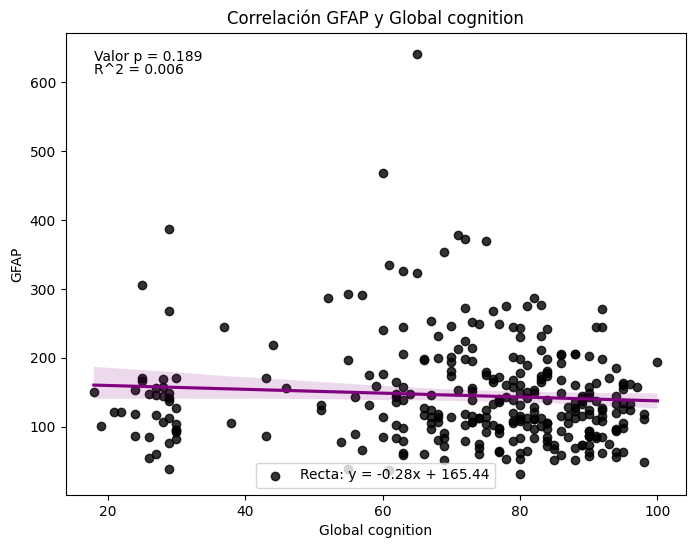

In [61]:
df_clean = df_completo.dropna(subset=['GFAP', 'Global cognition'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Global cognition'], df_clean['GFAP'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Global cognition', y='GFAP', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Global cognition'].min(), df_clean['GFAP'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Global cognition'].min(), df_clean['GFAP'].max() - 30, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación GFAP y Global cognition')
    plt.xlabel('Global cognition')
    plt.ylabel('GFAP')
    plt.legend(loc='lower center')
    plt.show()

### GFAP y memory

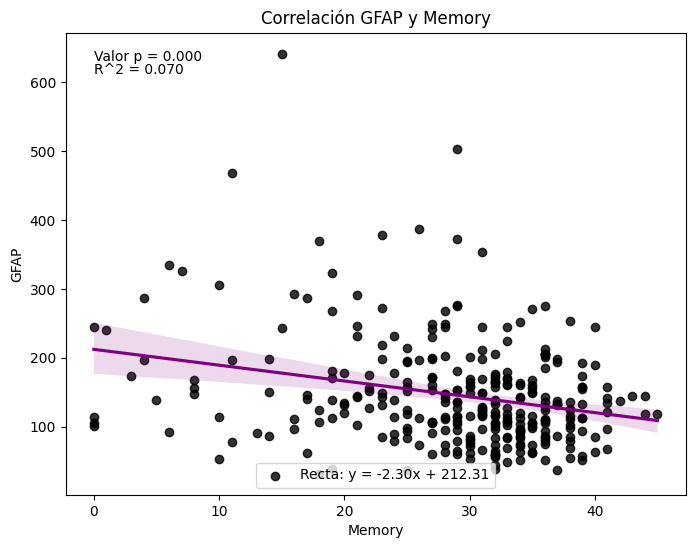

In [62]:
df_clean = df_completo.dropna(subset=['GFAP', 'Memory'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Memory'], df_clean['GFAP'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Memory', y='GFAP', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Memory'].min(), df_clean['GFAP'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Memory'].min(), df_clean['GFAP'].max() - 30, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación GFAP y Memory')
    plt.xlabel('Memory')
    plt.ylabel('GFAP')
    plt.legend(loc='lower center')
    plt.show()

### GFAP y attention

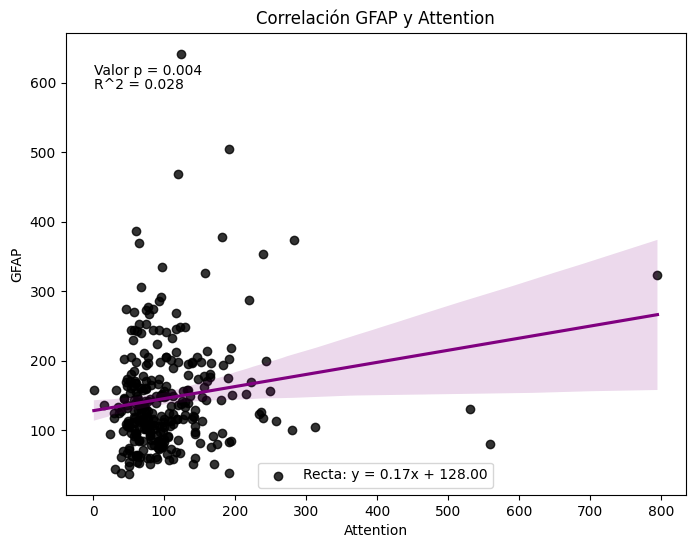

In [63]:
df_clean = df_completo.dropna(subset=['GFAP', 'Attention'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Attention'], df_clean['GFAP'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Attention', y='GFAP', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Attention'].min(), df_clean['GFAP'].max() - 30, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Attention'].min(), df_clean['GFAP'].max() - 50, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación GFAP y Attention')
    plt.xlabel('Attention')
    plt.ylabel('GFAP')
    plt.legend(loc='lower center')
    plt.show()

### GFAP y language

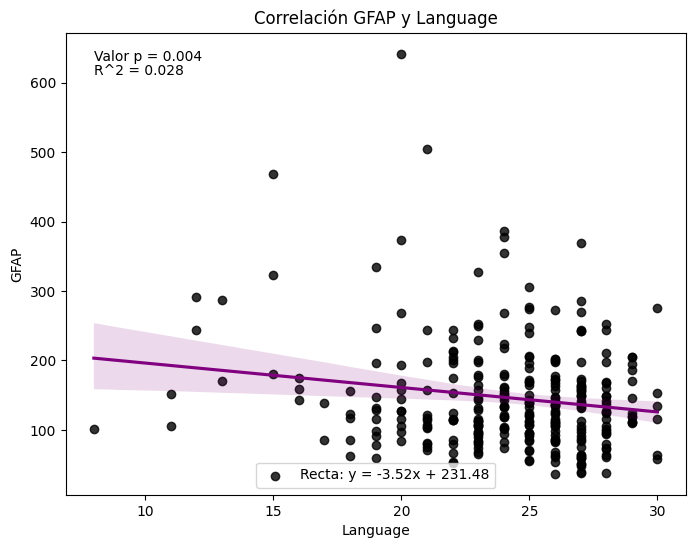

In [64]:
df_clean = df_completo.dropna(subset=['GFAP', 'Language'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Language'], df_clean['GFAP'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Language', y='GFAP', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Language'].min(), df_clean['GFAP'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Language'].min(), df_clean['GFAP'].max() - 30, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación GFAP y Language')
    plt.xlabel('Language')
    plt.ylabel('GFAP')
    plt.legend(loc='lower center')
    plt.show()

### GFAP y visuospatial

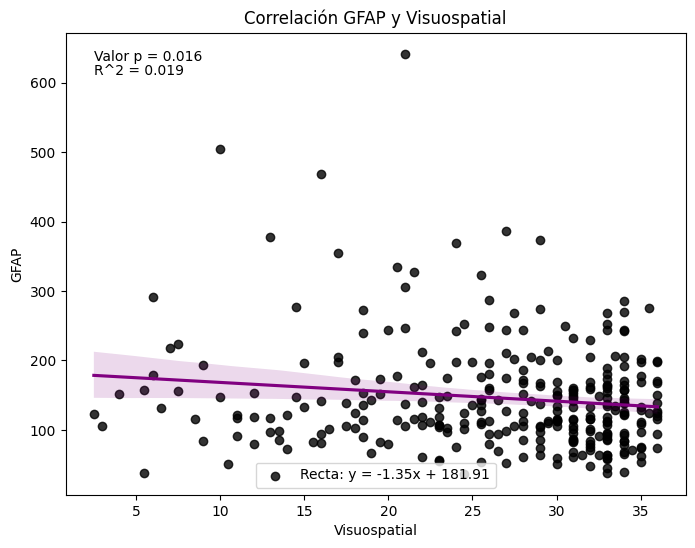

In [65]:
df_clean = df_completo.dropna(subset=['GFAP', 'Visuospatial'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Visuospatial'], df_clean['GFAP'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Visuospatial', y='GFAP', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Visuospatial'].min(), df_clean['GFAP'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Visuospatial'].min(), df_clean['GFAP'].max() -30, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación GFAP y Visuospatial')
    plt.xlabel('Visuospatial')
    plt.ylabel('GFAP')
    plt.legend(loc='lower center')
    plt.show()

### GFAP y Executive function

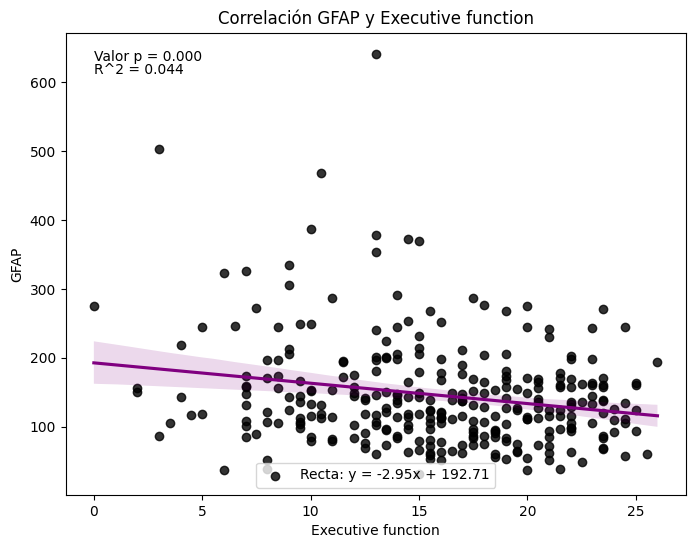

In [66]:
df_clean = df_completo.dropna(subset=['GFAP', 'Executive function'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Executive function'], df_clean['GFAP'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Executive function', y='GFAP', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Executive function'].min(), df_clean['GFAP'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Executive function'].min(), df_clean['GFAP'].max() - 30, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación GFAP y Executive function')
    plt.xlabel('Executive function')
    plt.ylabel('GFAP')
    plt.legend(loc='lower center')
    plt.show()

### GFAP y Social cognition

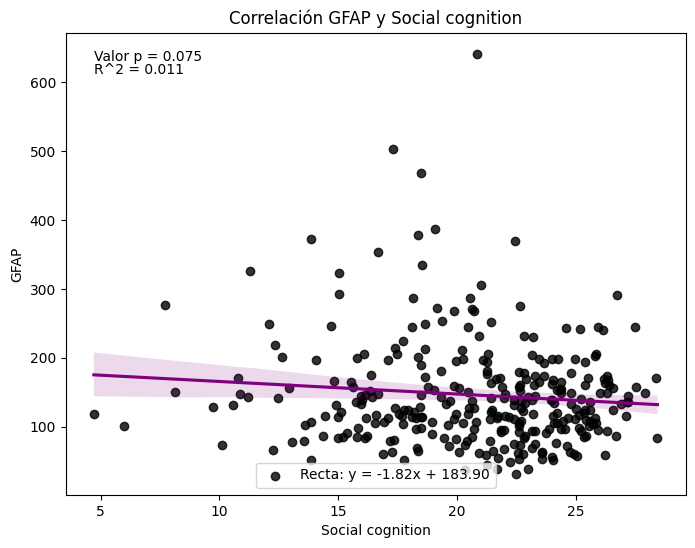

In [67]:
df_clean = df_completo.dropna(subset=['GFAP', 'Social cognition'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Social cognition'], df_clean['GFAP'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Social cognition', y='GFAP', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Social cognition'].min(), df_clean['GFAP'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Social cognition'].min(), df_clean['GFAP'].max() - 30, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación GFAP y Social cognition')
    plt.xlabel('Social cognition')
    plt.ylabel('GFAP')
    plt.legend(loc='lower center')
    plt.show()

### GFAP y functionality

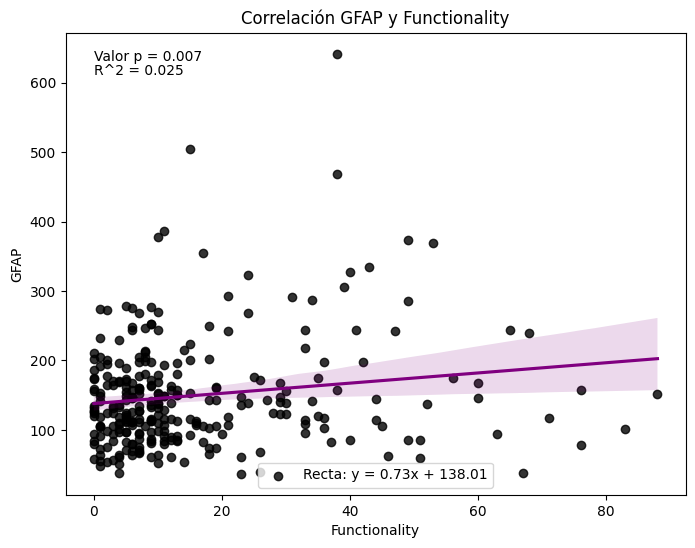

In [68]:
df_clean = df_completo.dropna(subset=['GFAP', 'Functionality'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Functionality'], df_clean['GFAP'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Functionality', y='GFAP', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Functionality'].min(), df_clean['GFAP'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Functionality'].min(), df_clean['GFAP'].max() - 30, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación GFAP y Functionality')
    plt.xlabel('Functionality')
    plt.ylabel('GFAP')
    plt.legend(loc='lower center')
    plt.show()

### Nfl y global cognition

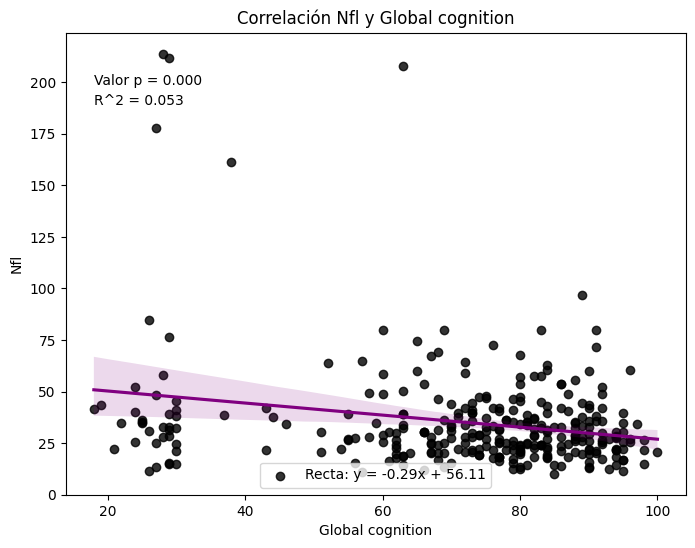

In [69]:
df_clean = df_completo.dropna(subset=['Nfl', 'Global cognition'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Global cognition'], df_clean['Nfl'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Global cognition', y='Nfl', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Global cognition'].min(), df_clean['Nfl'].max() - 15, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Global cognition'].min(), df_clean['Nfl'].max() - 25, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Nfl y Global cognition')
    plt.xlabel('Global cognition')
    plt.ylabel('Nfl')
    plt.legend(loc='lower center')
    plt.show()

### Nfl y memory

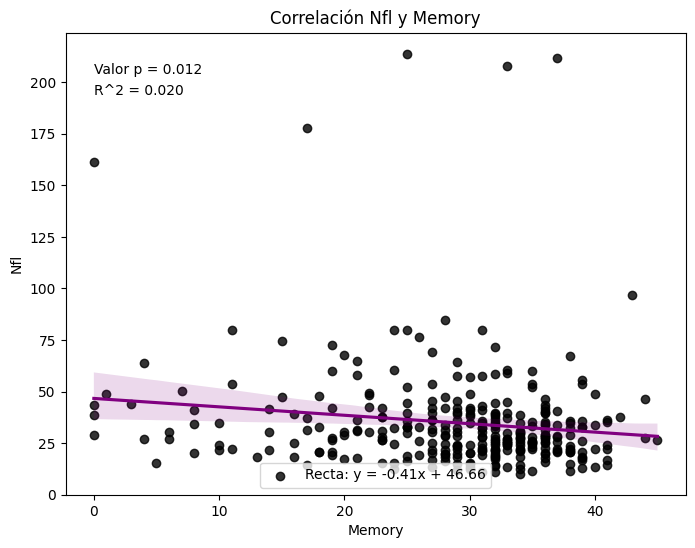

In [70]:
df_clean = df_completo.dropna(subset=['Nfl', 'Memory'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Memory'], df_clean['Nfl'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Memory', y='Nfl', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Memory'].min(), df_clean['Nfl'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Memory'].min(), df_clean['Nfl'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Nfl y Memory')
    plt.xlabel('Memory')
    plt.ylabel('Nfl')
    plt.legend(loc='lower center')
    plt.show()

### Nfl y attention

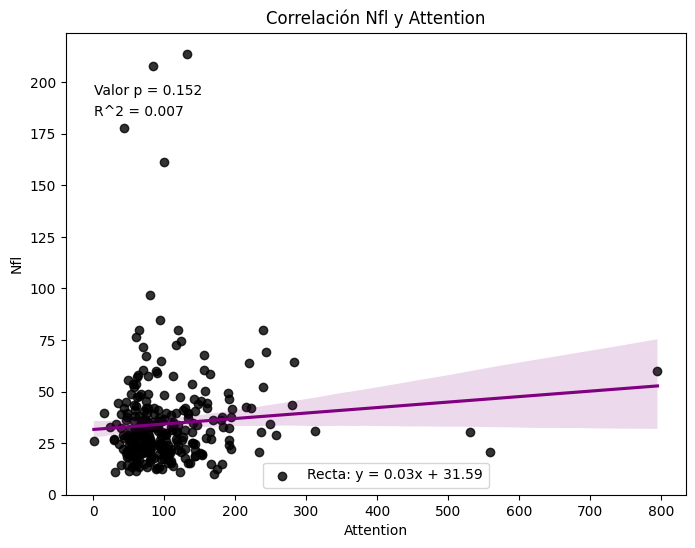

In [71]:
df_clean = df_completo.dropna(subset=['Nfl', 'Attention'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Attention'], df_clean['Nfl'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Attention', y='Nfl', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Attention'].min(), df_clean['Nfl'].max() - 20, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Attention'].min(), df_clean['Nfl'].max() - 30, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Nfl y Attention')
    plt.xlabel('Attention')
    plt.ylabel('Nfl')
    plt.legend(loc='lower center')
    plt.show()

### Nfl y language

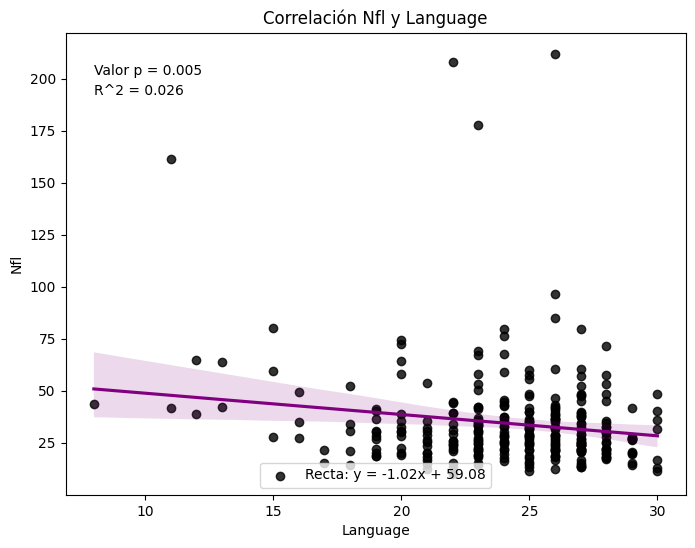

In [72]:
df_clean = df_completo.dropna(subset=['Nfl', 'Language'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Language'], df_clean['Nfl'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Language', y='Nfl', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Language'].min(), df_clean['Nfl'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Language'].min(), df_clean['Nfl'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Nfl y Language')
    plt.xlabel('Language')
    plt.ylabel('Nfl')
    plt.legend(loc='lower center')
    plt.show()

### Nfl y visuospatial

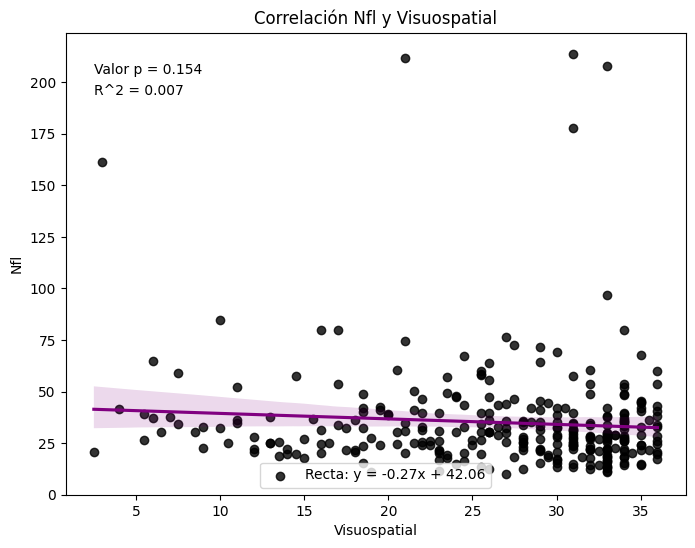

In [73]:
df_clean = df_completo.dropna(subset=['Nfl', 'Visuospatial'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Visuospatial'], df_clean['Nfl'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Visuospatial', y='Nfl', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Visuospatial'].min(), df_clean['Nfl'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Visuospatial'].min(), df_clean['Nfl'].max() -20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Nfl y Visuospatial')
    plt.xlabel('Visuospatial')
    plt.ylabel('Nfl')
    plt.legend(loc='lower center')
    plt.show()

### Nfl y Executive function

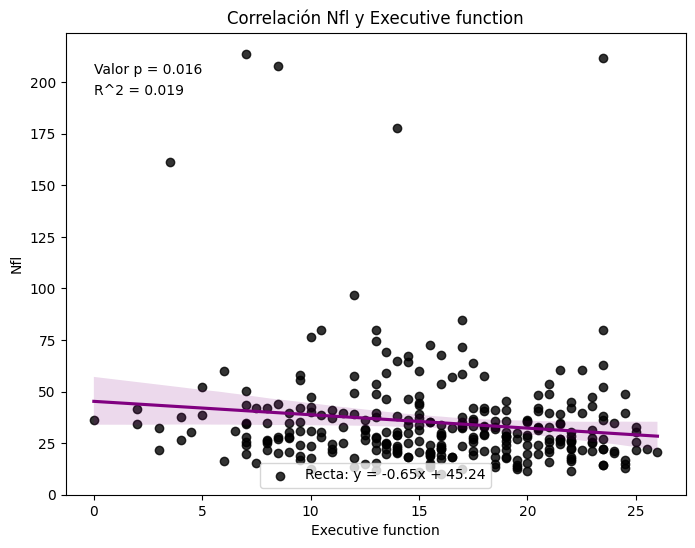

In [74]:
df_clean = df_completo.dropna(subset=['Nfl', 'Executive function'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Executive function'], df_clean['Nfl'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Executive function', y='Nfl', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Executive function'].min(), df_clean['Nfl'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Executive function'].min(), df_clean['Nfl'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Nfl y Executive function')
    plt.xlabel('Executive function')
    plt.ylabel('Nfl')
    plt.legend(loc='lower center')
    plt.show()

### Nfl y Social cognition

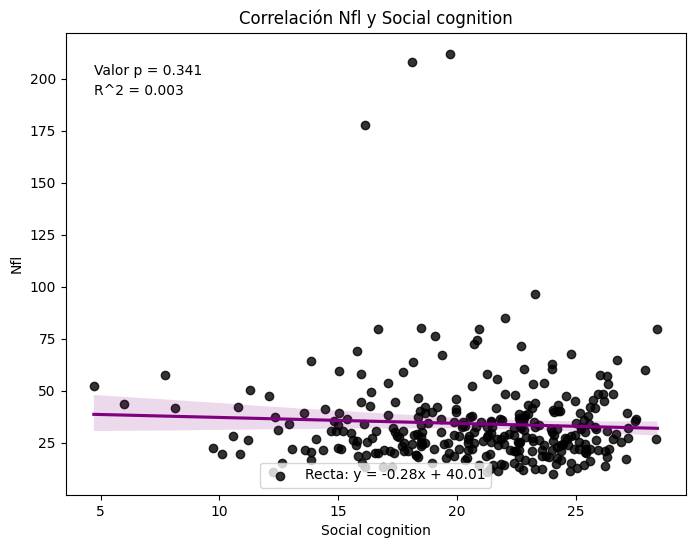

In [75]:
df_clean = df_completo.dropna(subset=['Nfl', 'Social cognition'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Social cognition'], df_clean['Nfl'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Social cognition', y='Nfl', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Social cognition'].min(), df_clean['Nfl'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Social cognition'].min(), df_clean['Nfl'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Nfl y Social cognition')
    plt.xlabel('Social cognition')
    plt.ylabel('Nfl')
    plt.legend(loc='lower center')
    plt.show()

### Nfl y functionality

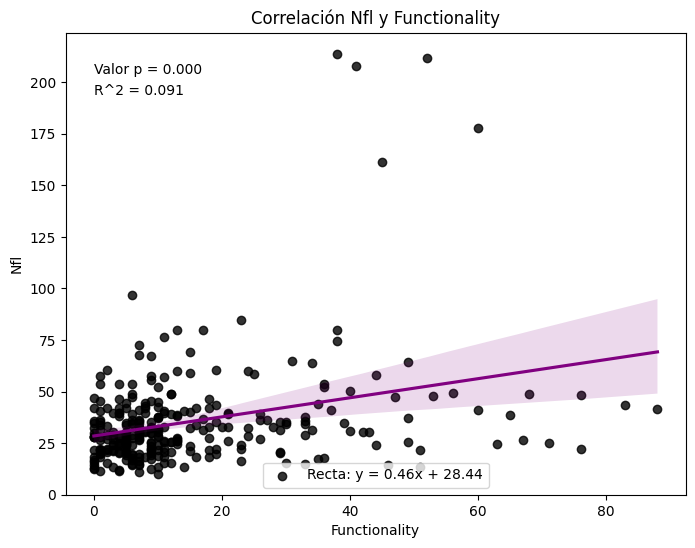

In [76]:
df_clean = df_completo.dropna(subset=['Nfl', 'Functionality'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Functionality'], df_clean['Nfl'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Functionality', y='Nfl', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Functionality'].min(), df_clean['Nfl'].max() - 10, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Functionality'].min(), df_clean['Nfl'].max() - 20, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación Nfl y Functionality')
    plt.xlabel('Functionality')
    plt.ylabel('Nfl')
    plt.legend(loc='lower center')
    plt.show()

### ptau217 y global cognition

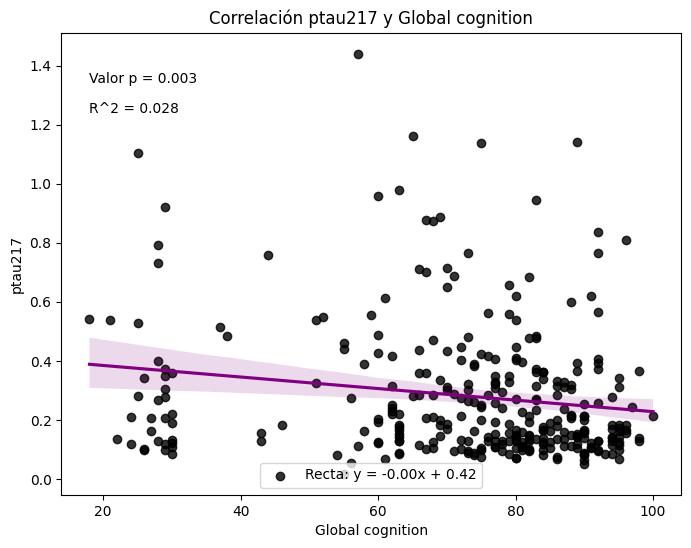

In [77]:
df_clean = df_completo.dropna(subset=['ptau217', 'Global cognition'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Global cognition'], df_clean['ptau217'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Global cognition', y='ptau217', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Global cognition'].min(), df_clean['ptau217'].max() - 0.1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Global cognition'].min(), df_clean['ptau217'].max() - 0.2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación ptau217 y Global cognition')
    plt.xlabel('Global cognition')
    plt.ylabel('ptau217')
    plt.legend(loc='lower center')
    plt.show()

### ptau217 y memory

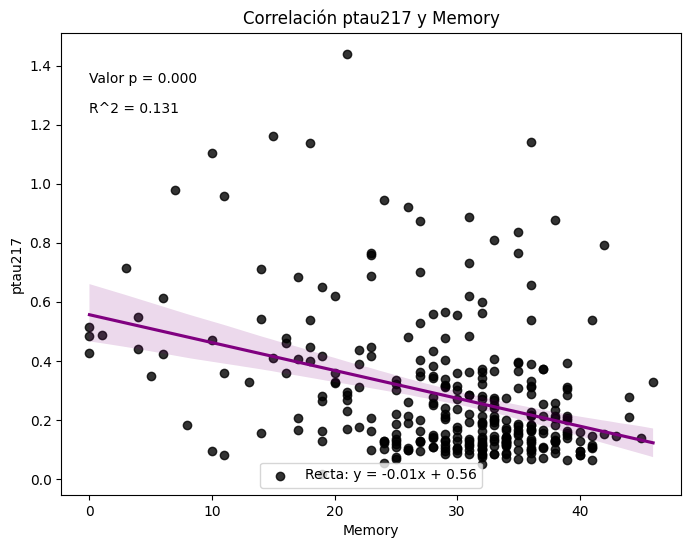

In [78]:
df_clean = df_completo.dropna(subset=['ptau217', 'Memory'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Memory'], df_clean['ptau217'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Memory', y='ptau217', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Memory'].min(), df_clean['ptau217'].max() - 0.1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Memory'].min(), df_clean['ptau217'].max() - 0.2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación ptau217 y Memory')
    plt.xlabel('Memory')
    plt.ylabel('ptau217')
    plt.legend(loc='lower center')
    plt.show()

### ptau217 y attention

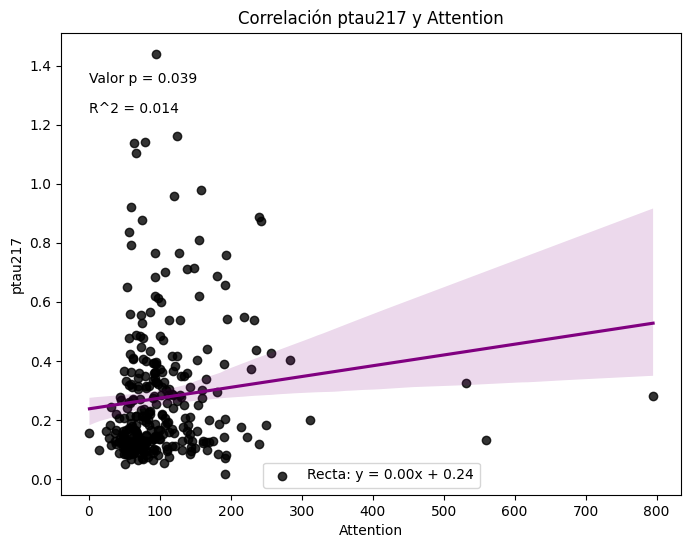

In [79]:
df_clean = df_completo.dropna(subset=['ptau217', 'Attention'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Attention'], df_clean['ptau217'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Attention', y='ptau217', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Attention'].min(), df_clean['ptau217'].max() - 0.1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Attention'].min(), df_clean['ptau217'].max() - 0.2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación ptau217 y Attention')
    plt.xlabel('Attention')
    plt.ylabel('ptau217')
    plt.legend(loc='lower center')
    plt.show()

### ptau217 y language

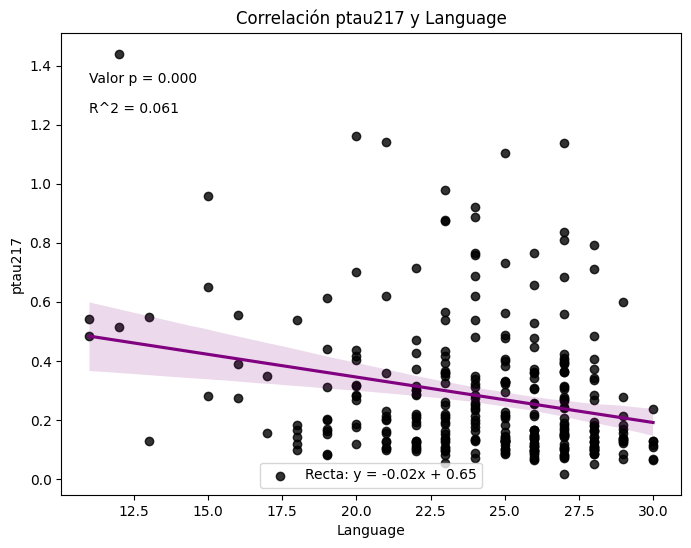

In [80]:
df_clean = df_completo.dropna(subset=['ptau217', 'Language'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Language'], df_clean['ptau217'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Language', y='ptau217', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Language'].min(), df_clean['ptau217'].max() - 0.1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Language'].min(), df_clean['ptau217'].max() - 0.2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación ptau217 y Language')
    plt.xlabel('Language')
    plt.ylabel('ptau217')
    plt.legend(loc='lower center')
    plt.show()

### Nfl y visuospatial

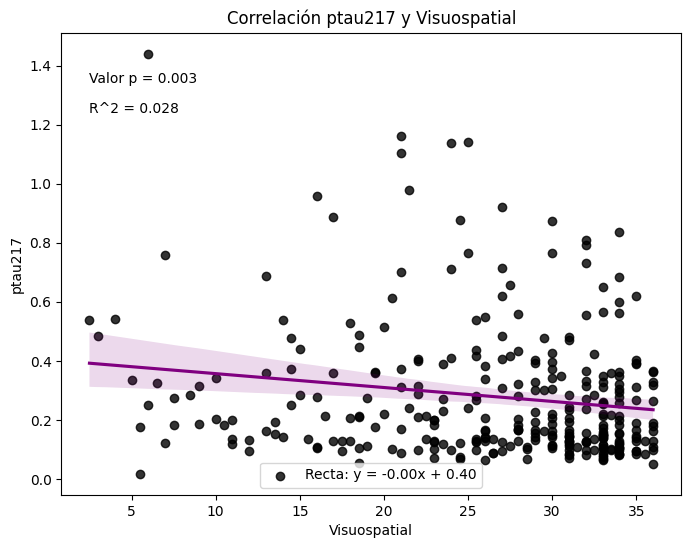

In [81]:
df_clean = df_completo.dropna(subset=['ptau217', 'Visuospatial'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Visuospatial'], df_clean['ptau217'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Visuospatial', y='ptau217', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Visuospatial'].min(), df_clean['ptau217'].max() - 0.1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Visuospatial'].min(), df_clean['ptau217'].max() -0.2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación ptau217 y Visuospatial')
    plt.xlabel('Visuospatial')
    plt.ylabel('ptau217')
    plt.legend(loc='lower center')
    plt.show()

### ptau217 y Executive function

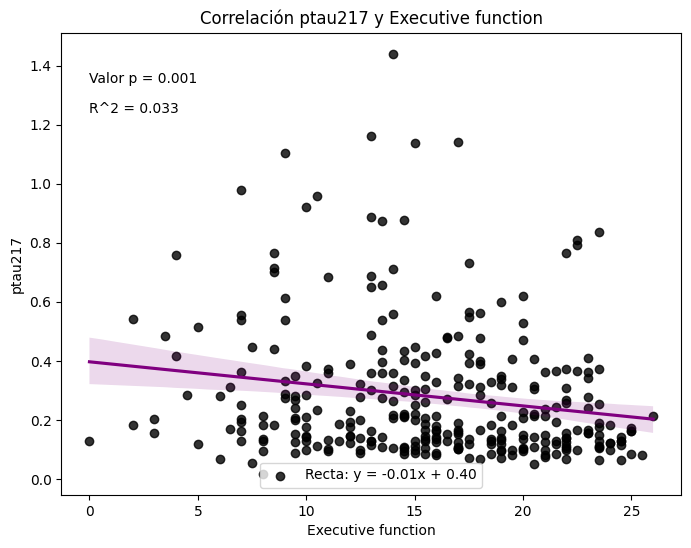

In [82]:
df_clean = df_completo.dropna(subset=['ptau217', 'Executive function'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Executive function'], df_clean['ptau217'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Executive function', y='ptau217', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Executive function'].min(), df_clean['ptau217'].max() - 0.1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Executive function'].min(), df_clean['ptau217'].max() - 0.2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación ptau217 y Executive function')
    plt.xlabel('Executive function')
    plt.ylabel('ptau217')
    plt.legend(loc='lower center')
    plt.show()

### ptau217 y Social cognition

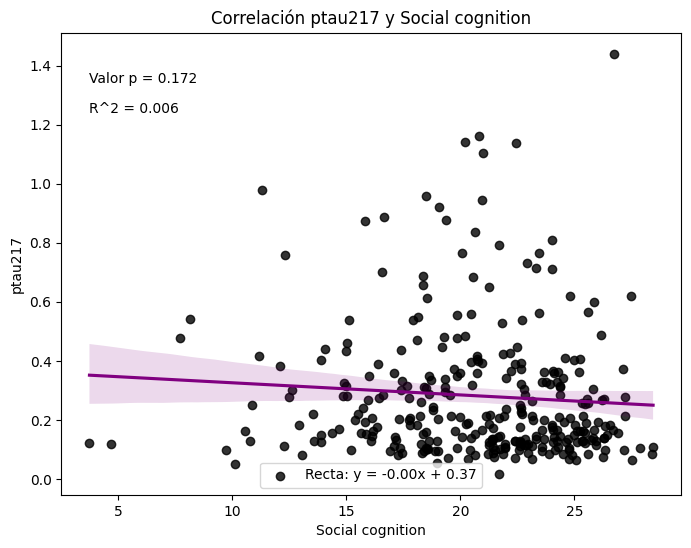

In [83]:
df_clean = df_completo.dropna(subset=['ptau217', 'Social cognition'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Social cognition'], df_clean['ptau217'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Social cognition', y='ptau217', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Social cognition'].min(), df_clean['ptau217'].max() - 0.1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Social cognition'].min(), df_clean['ptau217'].max() - 0.2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación ptau217 y Social cognition')
    plt.xlabel('Social cognition')
    plt.ylabel('ptau217')
    plt.legend(loc='lower center')
    plt.show()

### ptau217 y functionality

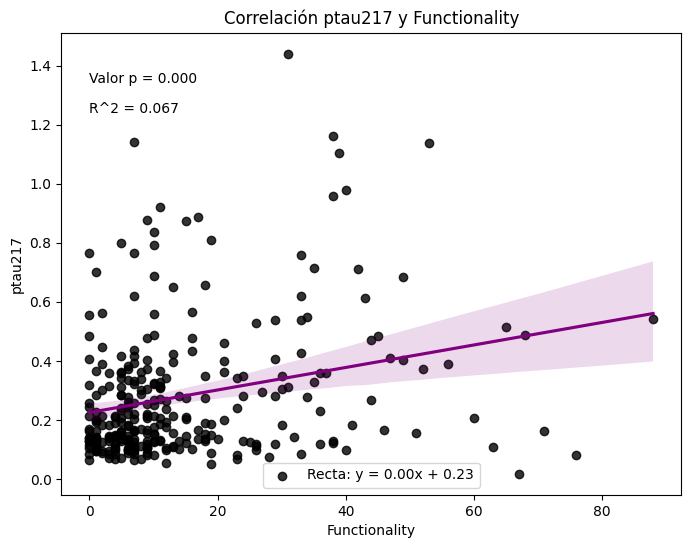

In [84]:
df_clean = df_completo.dropna(subset=['ptau217', 'Functionality'])

slope, intercept, r_value, p_value, std_err = linregress(df_clean['Functionality'], df_clean['ptau217'])

plt.figure(figsize=(8, 6))

if not (np.isnan(slope) or np.isnan(p_value)):
    sns.regplot(x='Functionality', y='ptau217', data=df_clean, scatter_kws={'color': 'black'}, line_kws={'color': 'purple'}, label=f'Recta: y = {slope:.2f}x + {intercept:.2f}')

    plt.text(df_clean['Functionality'].min(), df_clean['ptau217'].max() - 0.1, f'Valor p = {p_value:.3f}', fontsize=10)
    plt.text(df_clean['Functionality'].min(), df_clean['ptau217'].max() - 0.2, f'R^2 = {r_value**2:.3f}', fontsize=10)

    plt.title('Correlación ptau217 y Functionality')
    plt.xlabel('Functionality')
    plt.ylabel('ptau217')
    plt.legend(loc='lower center')
    plt.show()